In [1]:
#pip install lightgbm

In [2]:
#pip3 install xgboost

In [3]:
#pip install xgboost

In [4]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotnine import ggplot, aes, geom_count ,geom_violin ,geom_tile,scale_fill_gradient2

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from datetime import datetime

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score,train_test_split, StratifiedKFold, learning_curve, KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, StratifiedShuffleSplit,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score

# Choose the model you want to use (replace 'ModelName' with the actual name)
from sklearn.tree import DecisionTreeRegressor  # Decision Tree
from sklearn.ensemble import RandomForestRegressor  # Random Forest
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting
from xgboost import XGBRegressor  # XGBoost
#import xgboost
#from lightgbm import LGBMRegressor  # LightGBM
#import lightgbm as lgb

from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor

from sklearn import tree
#from dtreeviz.trees import dtreeviz


# Import data

In [5]:
sample_sub = pd.read_csv('sample_submission.csv')
car_train_data = pd.read_csv('train.csv')
car_test_data = pd.read_csv('test.csv')

In [6]:
car_train_data.head()

model  year motor_type        running wheel    color   type  \
0         toyota  2022     petrol       3000  km  left  skyblue  sedan   
1  mercedes-benz  2014     petrol     132000  km  left    black  sedan   
2            kia  2018     petrol   95000  miles  left    other  sedan   
3  mercedes-benz  2002     petrol  137000  miles  left   golden  sedan   
4  mercedes-benz  2017     petrol     130000  km  left    black  sedan   

      status  motor_volume  price  
0  excellent           2.0  24500  
1  excellent           2.0  25500  
2  excellent           2.0  11700  
3  excellent           3.2  12000  
4       good           2.0  26000

In [7]:
car_test_data.head()

Id          model  year motor_type       running wheel   color       type  \
0   0            kia  2020     petrol     24000  km  left   black      sedan   
1   1         nissan  2017     petrol  85000  miles  left   white        suv   
2   2        hyundai  2021     petrol  30000  miles  left   white      sedan   
3   3            kia  2018     petrol  53000  miles  left  silver      sedan   
4   4  mercedes-benz  2003     petrol    230000  km  left   black  Universal   

      status  motor_volume  
0  excellent           2.0  
1  excellent           2.0  
2  excellent           2.0  
3  excellent           2.0  
4     normal           1.8

# Basic explore data

In [8]:
car_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB


In [9]:
car_train_data.isnull().sum()

model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
price           0
dtype: int64

In [10]:
all_col_ls = ['model','year','motor_type','running','wheel','color','type','status','motor_volume']
cate_col_ls = ['model','motor_type','running','wheel','color','type','status']

In [11]:
car_train_data['model'].value_counts()

model
mercedes-benz    402
hyundai          351
nissan           350
kia              285
toyota           254
Name: count, dtype: int64

In [12]:
#for i in all_col_ls:
#    print(car_train_data[i].value_counts())
#    print('--------------------------------------------------')

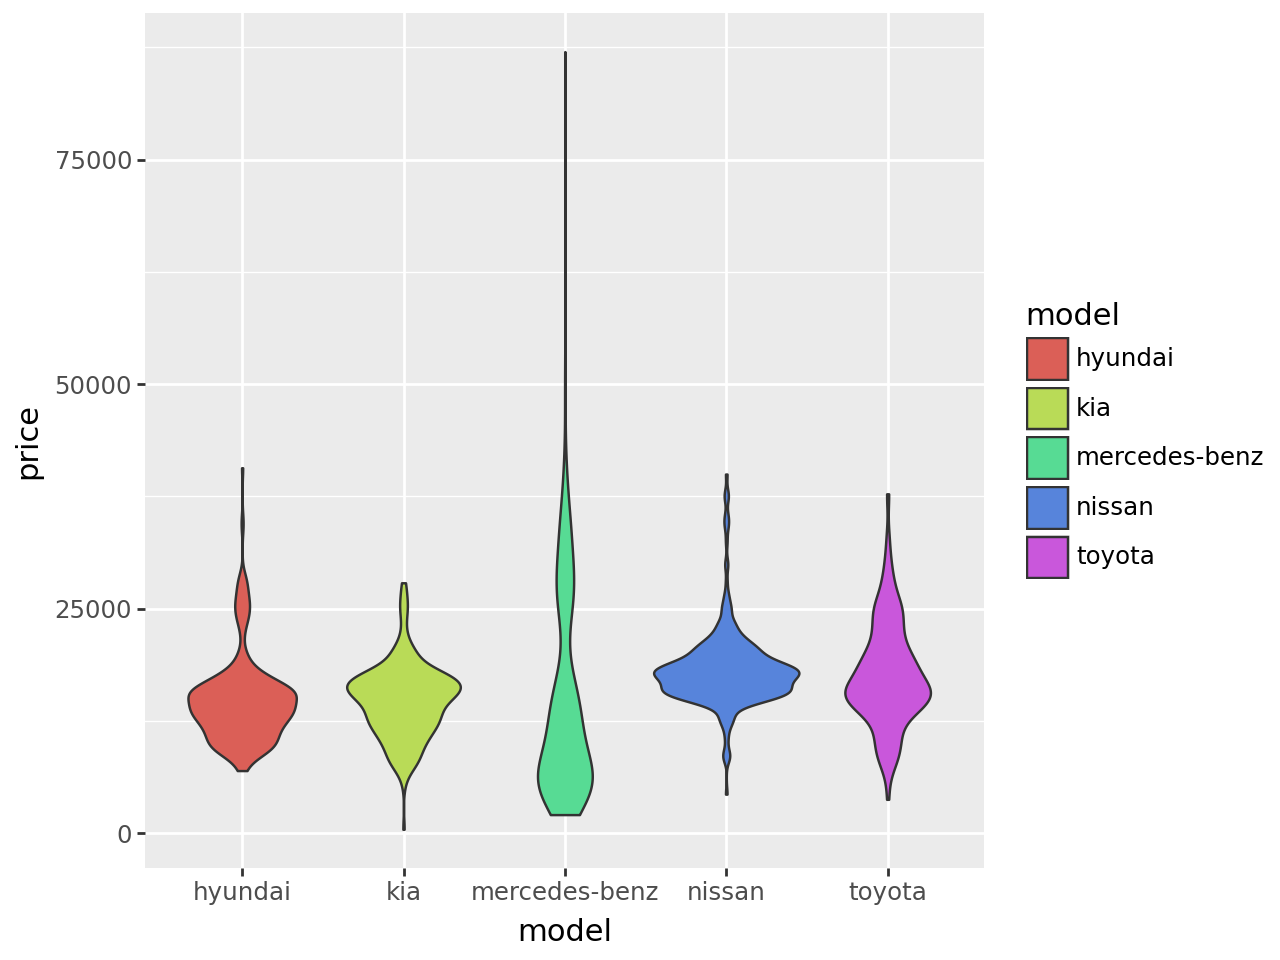

In [13]:
ggplot(car_train_data) + aes(x='model',y='price',fill='model') + geom_violin()

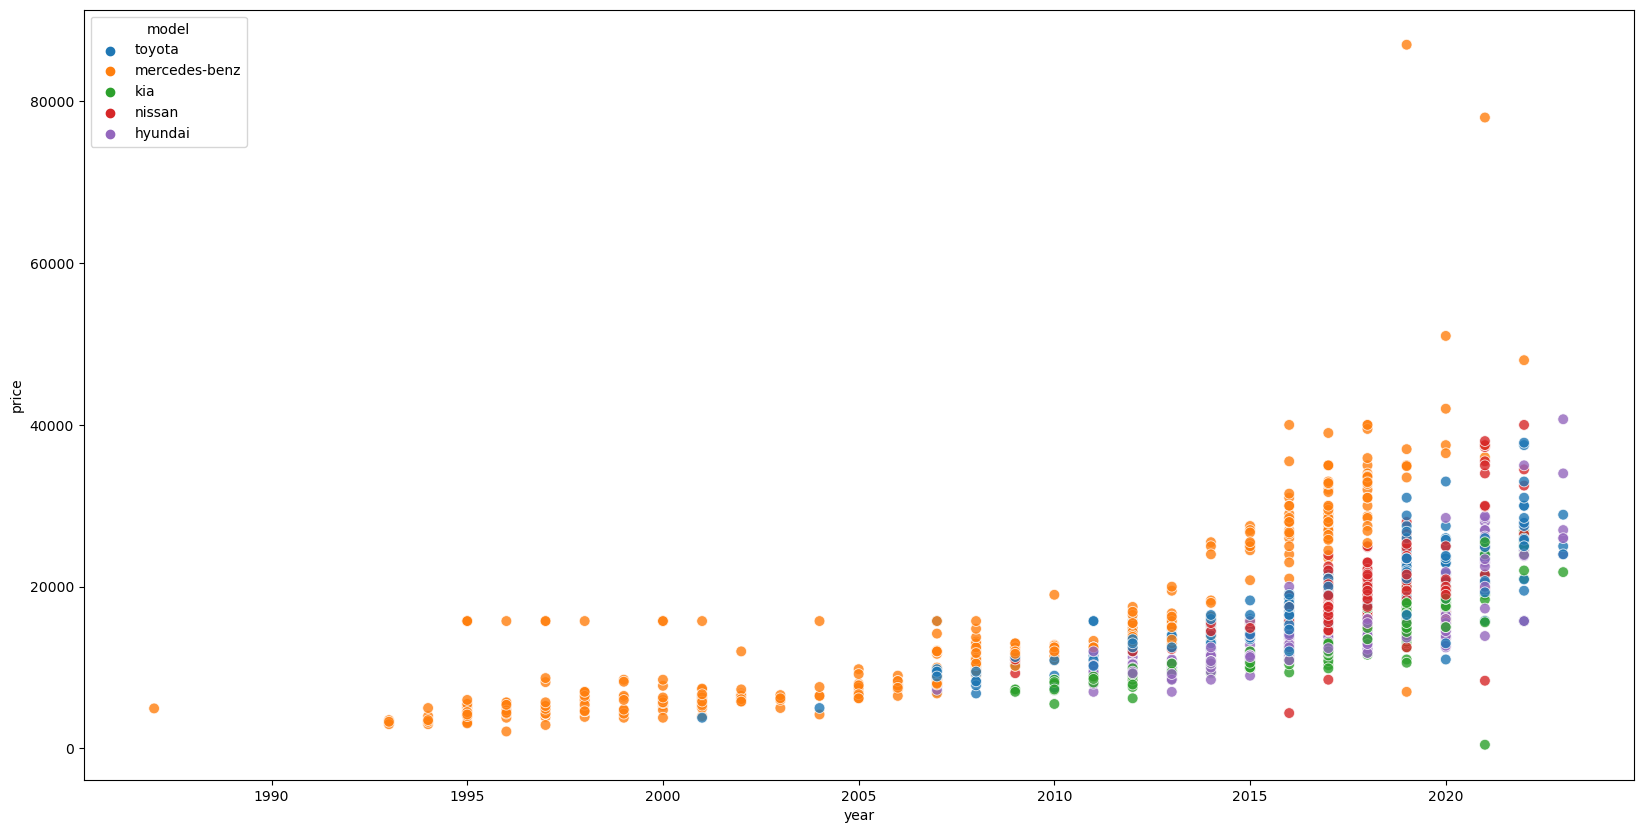

In [14]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=car_train_data, x="year", y="price", hue="model",s=60,alpha=0.8)
plt.show()

# Process data

In [15]:
car_train_proc = car_train_data[:]

In [16]:
car_train_proc[['running']].tail()

running
1637  120000  miles
1638     170000  km
1639   68900  miles
1640   31000  miles
1641         20  km

In [17]:
car_train_proc["running"].str.split(" ")

0            [3000, , km]
1          [132000, , km]
2        [95000, , miles]
3       [137000, , miles]
4          [130000, , km]
              ...        
1637    [120000, , miles]
1638       [170000, , km]
1639     [68900, , miles]
1640     [31000, , miles]
1641           [20, , km]
Name: running, Length: 1642, dtype: object

In [18]:
car_train_proc['running_nm'] = car_train_proc.apply(lambda x: int(x["running"].split(" ")[0]), axis=1)
car_train_proc['running_unit'] = car_train_proc.apply(lambda x: x["running"].split(" ")[2], axis=1)

/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/3284167648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/3284167648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
car_train_proc.head()

model  year motor_type        running wheel    color   type  \
0         toyota  2022     petrol       3000  km  left  skyblue  sedan   
1  mercedes-benz  2014     petrol     132000  km  left    black  sedan   
2            kia  2018     petrol   95000  miles  left    other  sedan   
3  mercedes-benz  2002     petrol  137000  miles  left   golden  sedan   
4  mercedes-benz  2017     petrol     130000  km  left    black  sedan   

      status  motor_volume  price  running_nm running_unit  
0  excellent           2.0  24500        3000           km  
1  excellent           2.0  25500      132000           km  
2  excellent           2.0  11700       95000        miles  
3  excellent           3.2  12000      137000        miles  
4       good           2.0  26000      130000           km

In [20]:
car_train_proc['model'][0]

'toyota'

In [21]:
car_train_proc['running_unit'].value_counts()

running_unit
km       846
miles    796
Name: count, dtype: int64

In [22]:
car_train_proc['running_km'] = np.nan

/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/104420368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
for i in range(len(car_train_proc)):
    if car_train_proc['running_unit'][i] == 'miles':
        car_train_proc['running_km'][i] = car_train_proc['running_nm'][i] * 1.61
    else:
        car_train_proc['running_km'][i] = car_train_proc['running_nm'][i]

/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/4148278444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/4148278444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/4148278444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28

/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/4148278444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/4148278444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/4148278444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28

/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/4148278444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/4148278444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/4148278444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28

In [24]:
car_train_proc.head()

model  year motor_type        running wheel    color   type  \
0         toyota  2022     petrol       3000  km  left  skyblue  sedan   
1  mercedes-benz  2014     petrol     132000  km  left    black  sedan   
2            kia  2018     petrol   95000  miles  left    other  sedan   
3  mercedes-benz  2002     petrol  137000  miles  left   golden  sedan   
4  mercedes-benz  2017     petrol     130000  km  left    black  sedan   

      status  motor_volume  price  running_nm running_unit  running_km  
0  excellent           2.0  24500        3000           km      3000.0  
1  excellent           2.0  25500      132000           km    132000.0  
2  excellent           2.0  11700       95000        miles    152950.0  
3  excellent           3.2  12000      137000        miles    220570.0  
4       good           2.0  26000      130000           km    130000.0

## outliers

In [25]:
def find_iqr_outliers(df, column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
  return [lower_bound,upper_bound]

In [26]:
find_iqr_outliers(car_train_proc, 'price')

[2250.0, 28250.0]

In [27]:
find_iqr_outliers(car_train_proc, 'running_km')

[-100594.8125, 317924.6875]

In [28]:
car_train_proc[(car_train_proc['price'] <= 30000) & (car_train_proc['price'] >= 2250)]

model  year motor_type        running wheel    color   type  \
0            toyota  2022     petrol       3000  km  left  skyblue  sedan   
1     mercedes-benz  2014     petrol     132000  km  left    black  sedan   
2               kia  2018     petrol   95000  miles  left    other  sedan   
3     mercedes-benz  2002     petrol  137000  miles  left   golden  sedan   
4     mercedes-benz  2017     petrol     130000  km  left    black  sedan   
...             ...   ...        ...            ...   ...      ...    ...   
1637        hyundai  2017     petrol  120000  miles  left    white  sedan   
1638         toyota  2014     petrol     170000  km  left    black  sedan   
1639         nissan  2018     petrol   68900  miles  left     blue    suv   
1640         nissan  2019     petrol   31000  miles  left    black    suv   
1641         toyota  2022     petrol         20  km  left    white  sedan   

         status  motor_volume  price  running_nm running_unit  running_km  
0     excellent           2.0  24500        3000           km      3000.0  
1     excellent           2.0  25500      132000           km    132000.0  
2     excellent           2.0  11700       95000        miles    152950.0  
3     excellent           3.2  12000      137000        miles    220570.0  
4          good           2.0  26000      130000           km    130000.0  
...         ...           ...    ...         ...          ...         ...  
1637       good           2.0  12400      120000        miles    193200.0  
1638       good           2.0  16500      170000           km    170000.0  
1639       good           2.0  19500       68900        miles    110929.0  
1640  excellent           2.0  19500       31000        miles     49910.0  
1641  excellent           2.0  28500          20           km        20.0  

[1577 rows x 13 columns]

In [29]:
car_train_proc = car_train_proc[(car_train_proc['price'] <= 30000) & (car_train_proc['price'] >= 2250)]
car_train_proc = car_train_proc[(car_train_proc['running_km'] <= 320000)]

In [30]:
car_train_proc

model  year motor_type        running wheel    color   type  \
0            toyota  2022     petrol       3000  km  left  skyblue  sedan   
1     mercedes-benz  2014     petrol     132000  km  left    black  sedan   
2               kia  2018     petrol   95000  miles  left    other  sedan   
3     mercedes-benz  2002     petrol  137000  miles  left   golden  sedan   
4     mercedes-benz  2017     petrol     130000  km  left    black  sedan   
...             ...   ...        ...            ...   ...      ...    ...   
1637        hyundai  2017     petrol  120000  miles  left    white  sedan   
1638         toyota  2014     petrol     170000  km  left    black  sedan   
1639         nissan  2018     petrol   68900  miles  left     blue    suv   
1640         nissan  2019     petrol   31000  miles  left    black    suv   
1641         toyota  2022     petrol         20  km  left    white  sedan   

         status  motor_volume  price  running_nm running_unit  running_km  
0     excellent           2.0  24500        3000           km      3000.0  
1     excellent           2.0  25500      132000           km    132000.0  
2     excellent           2.0  11700       95000        miles    152950.0  
3     excellent           3.2  12000      137000        miles    220570.0  
4          good           2.0  26000      130000           km    130000.0  
...         ...           ...    ...         ...          ...         ...  
1637       good           2.0  12400      120000        miles    193200.0  
1638       good           2.0  16500      170000           km    170000.0  
1639       good           2.0  19500       68900        miles    110929.0  
1640  excellent           2.0  19500       31000        miles     49910.0  
1641  excellent           2.0  28500          20           km        20.0  

[1534 rows x 13 columns]

# EDA

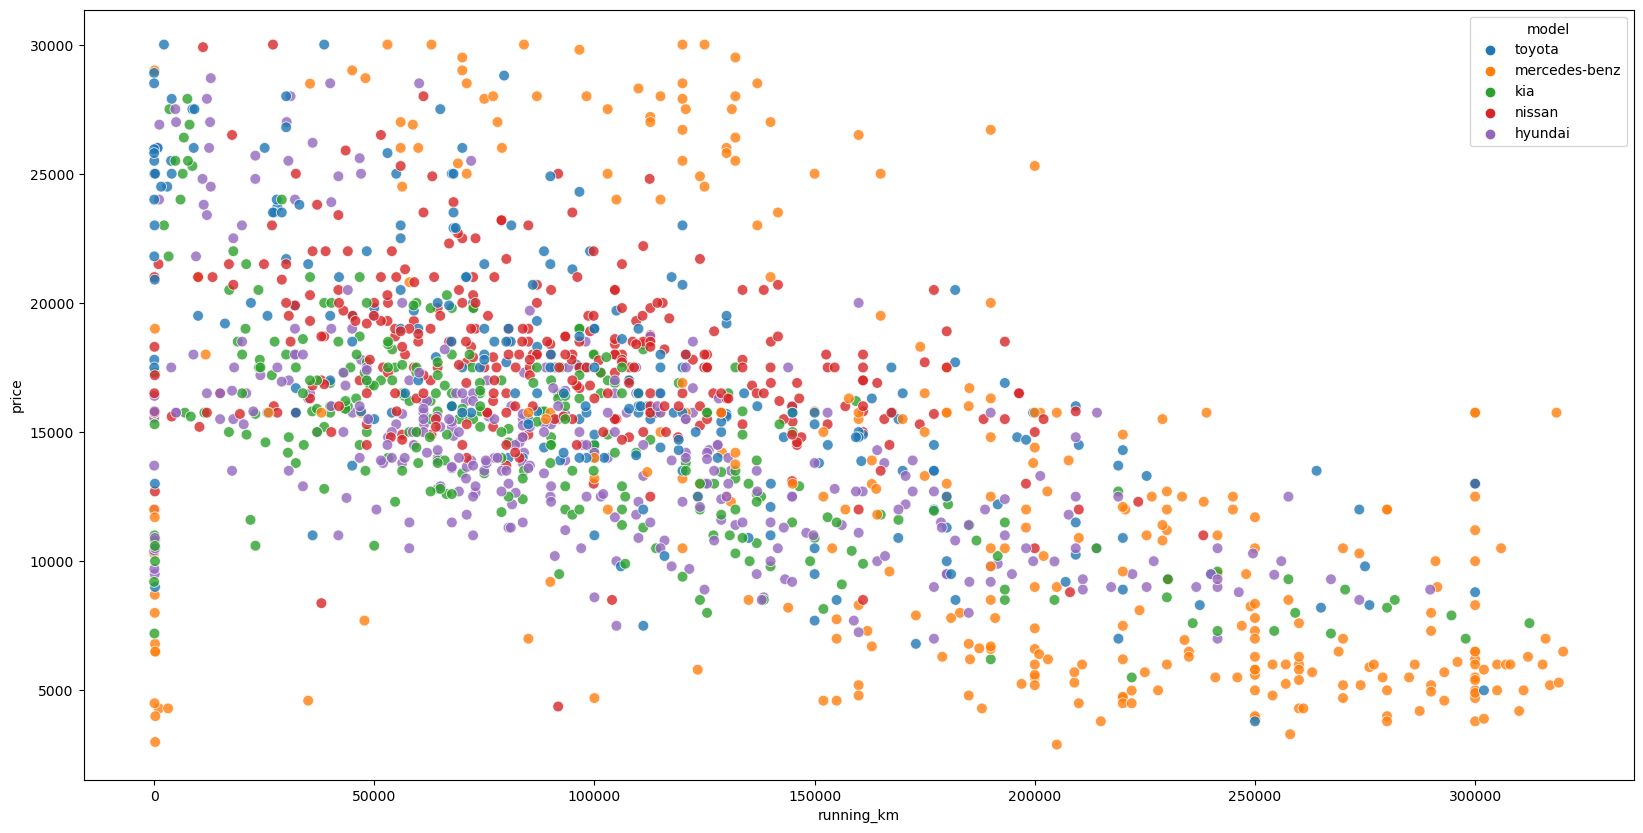

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=car_train_proc, x="running_km", y="price", hue="model",s=60,alpha=0.8)
plt.show()

<Figure size 2000x2000 with 0 Axes>

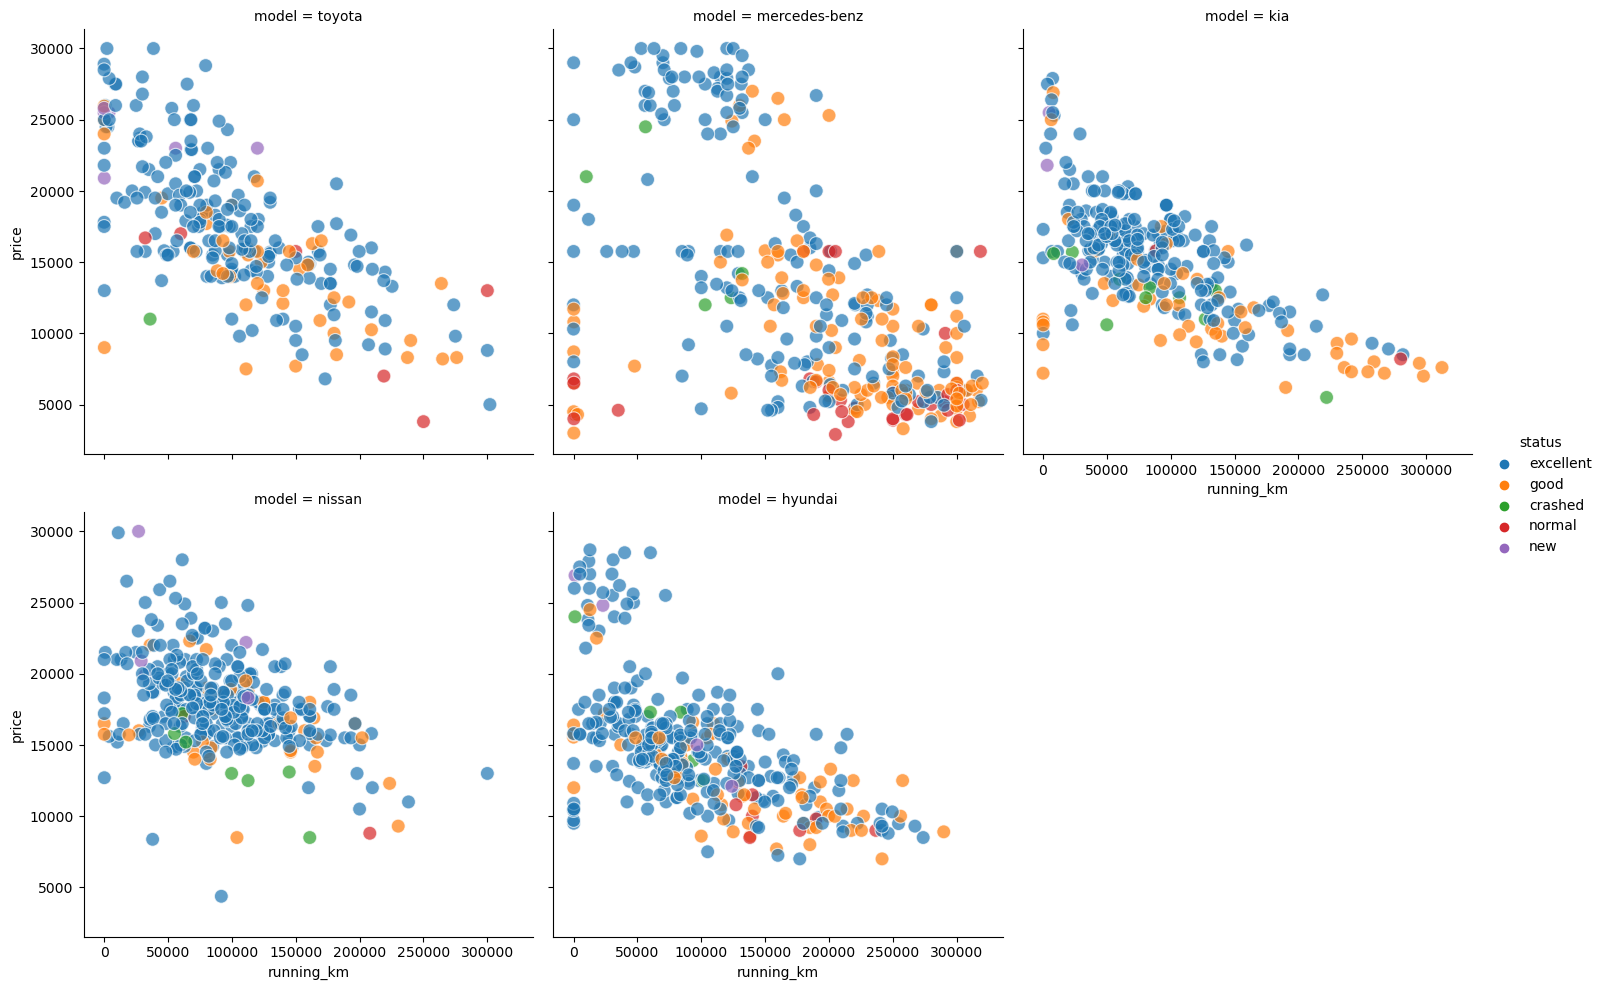

In [32]:
plt.figure(figsize=(20,20))
sns.relplot(data=car_train_proc, x="running_km", y="price"
            , hue="status",col="model",col_wrap=3,s=100,alpha=0.7)
plt.show()

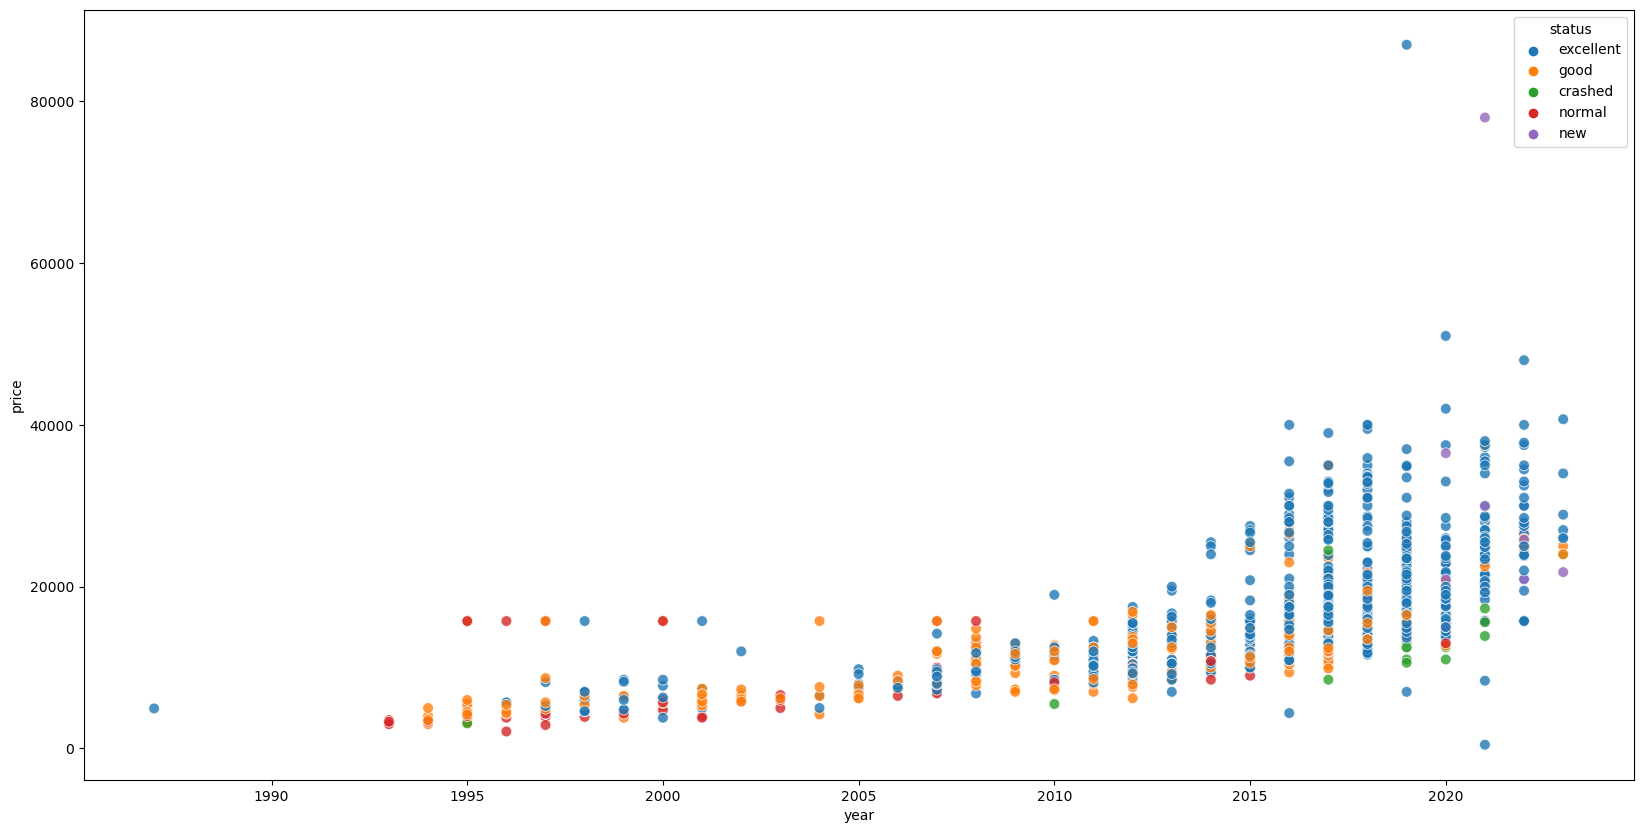

In [33]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=car_train_data, x="year", y="price", hue="status",s=60,alpha=0.8)
plt.show()

<Figure size 2000x2000 with 0 Axes>

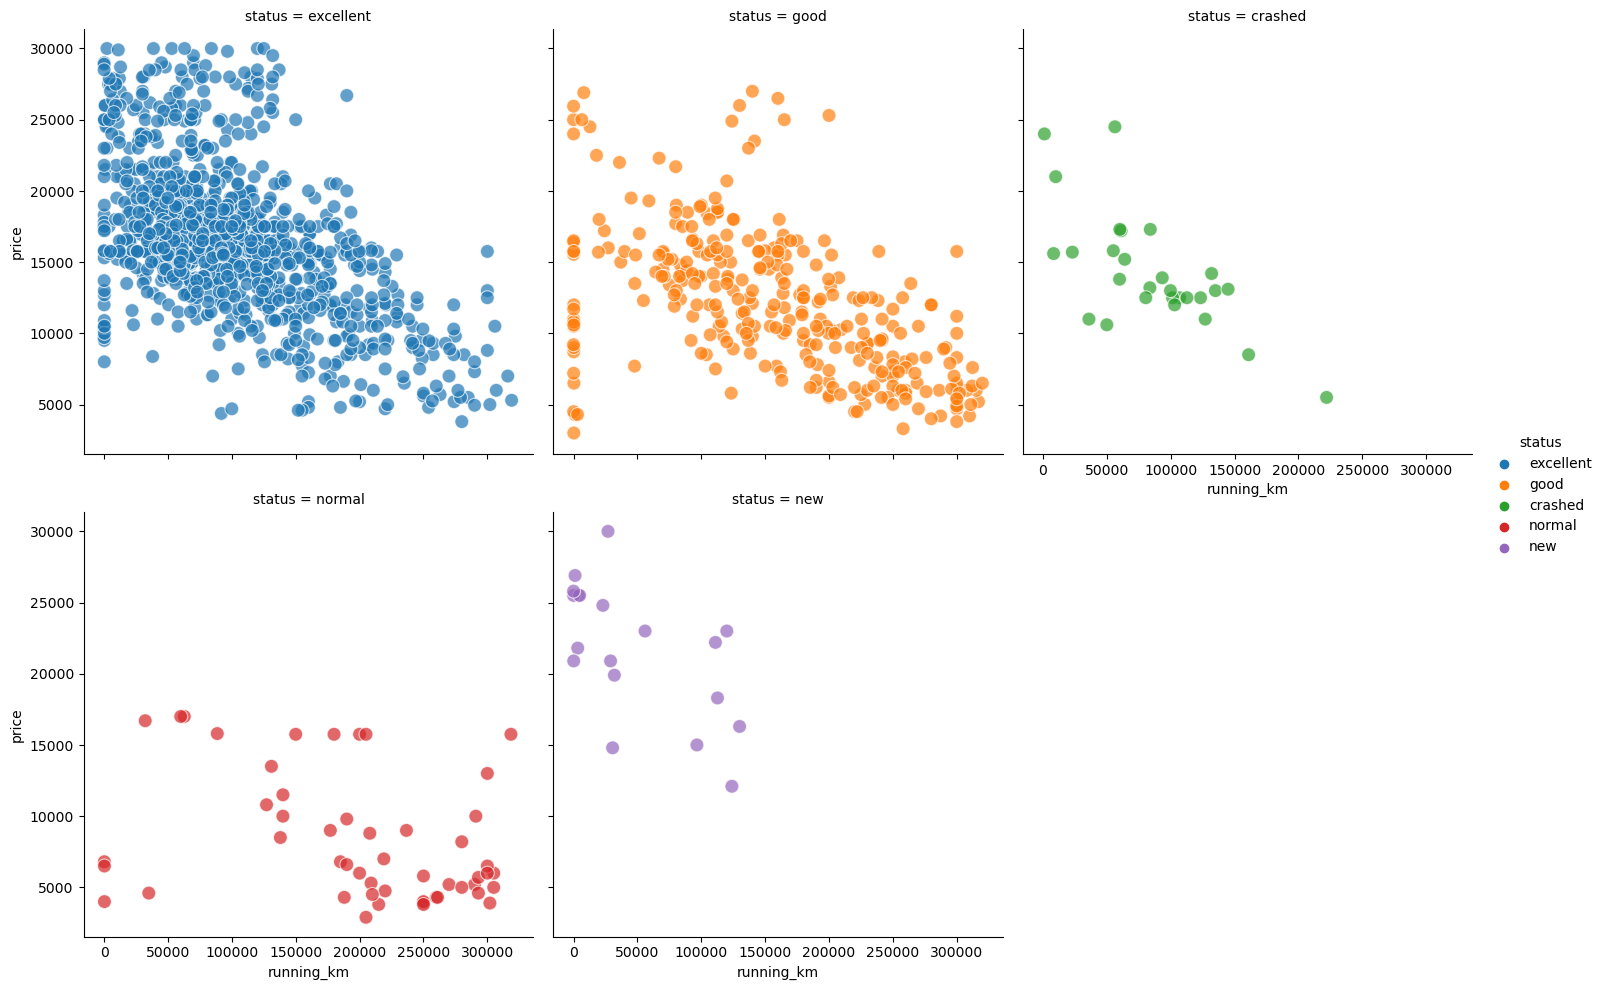

In [34]:
plt.figure(figsize=(20,20))
sns.relplot(data=car_train_proc, x="running_km", y="price"
            , hue="status",col="status",col_wrap=3,s=100,alpha=0.7)
plt.show()

<Figure size 2000x2000 with 0 Axes>

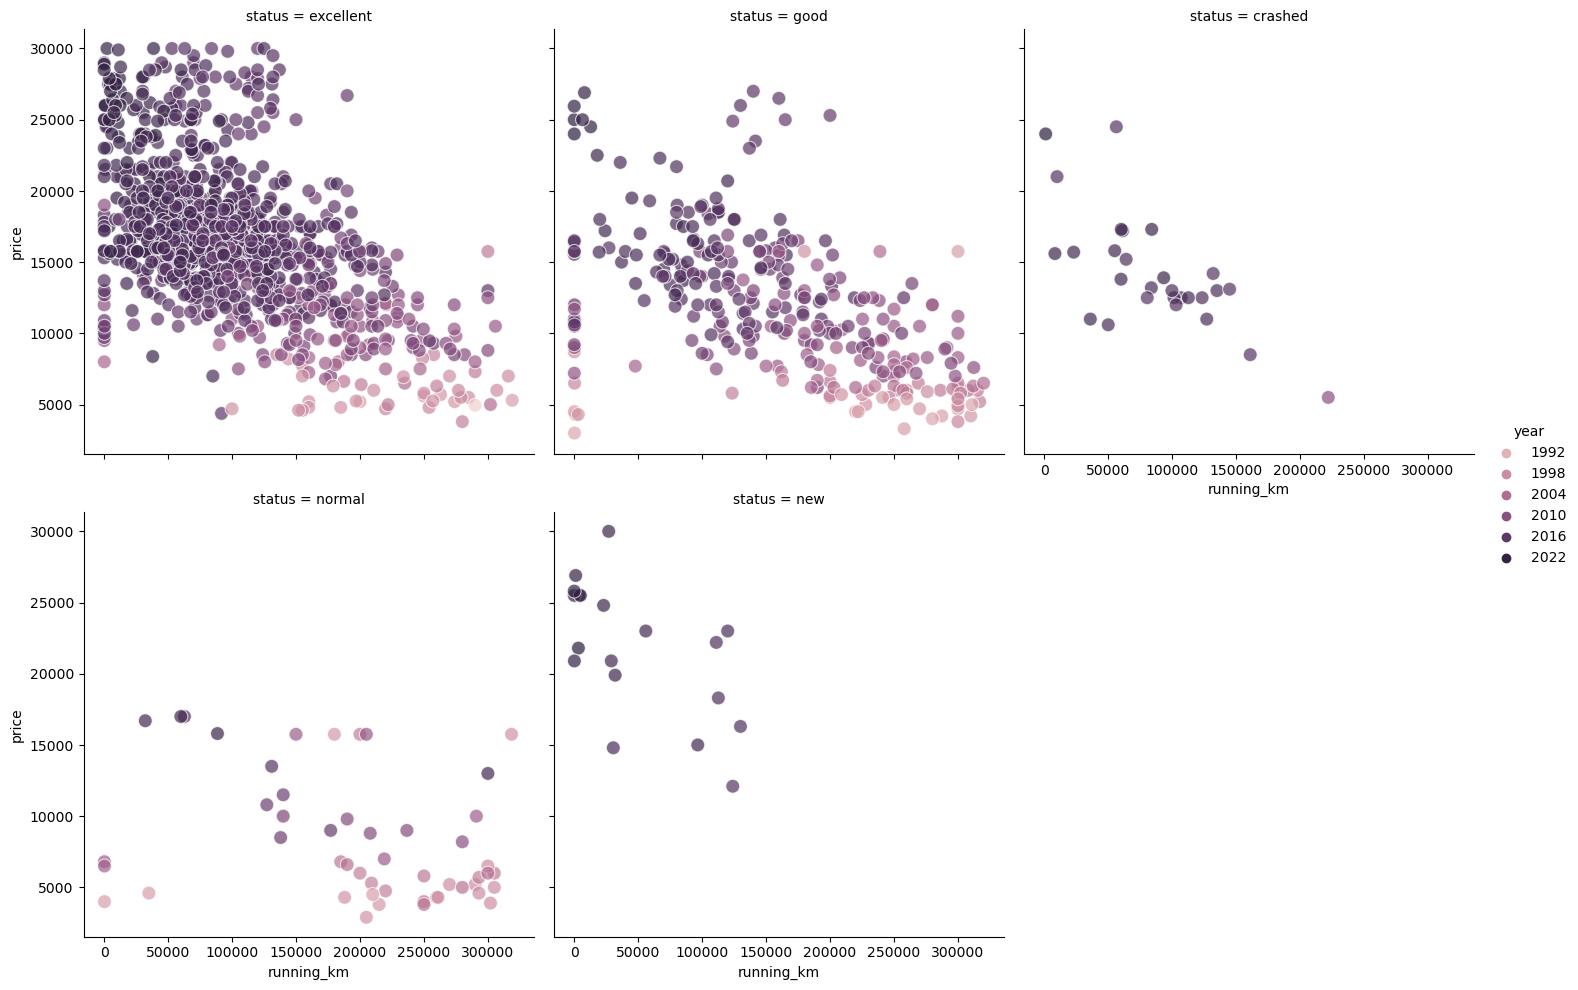

In [35]:
plt.figure(figsize=(20,20))
sns.relplot(data=car_train_proc, x="running_km", y="price"
            , hue="year",col="status",col_wrap=3,s=100,alpha=0.7)
plt.show()

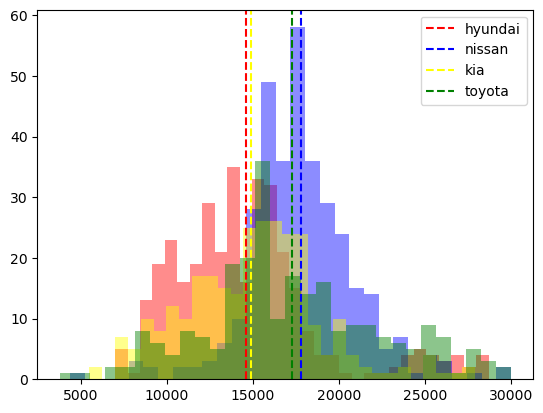

In [36]:
plt.hist(car_train_proc[car_train_proc['model']=='hyundai']['price'], bins=30, alpha=0.45, color='red') 
plt.hist(car_train_proc[car_train_proc['model']=='nissan']['price'], bins=30, alpha=0.45, color='blue') 
plt.hist(car_train_proc[car_train_proc['model']=='kia']['price'], bins=30, alpha=0.45, color='yellow') 
plt.hist(car_train_proc[car_train_proc['model']=='toyota']['price'], bins=30, alpha=0.45, color='green') 
#plt.hist(car_train_proc[car_train_proc['model']=='mercedes-benz']['price'], bins=50, alpha=0.45, color='grey') 

plt.axvline(x=car_train_proc[car_train_proc['model']=='hyundai']['price'].mean(),linestyle='dashed',color='red')
plt.axvline(x=car_train_proc[car_train_proc['model']=='nissan']['price'].mean(),linestyle='dashed',color='blue')
plt.axvline(x=car_train_proc[car_train_proc['model']=='kia']['price'].mean(),linestyle='dashed',color='yellow')
plt.axvline(x=car_train_proc[car_train_proc['model']=='toyota']['price'].mean(),linestyle='dashed',color='green')


plt.legend(['hyundai','nissan','kia','toyota']) 
  
plt.show() 

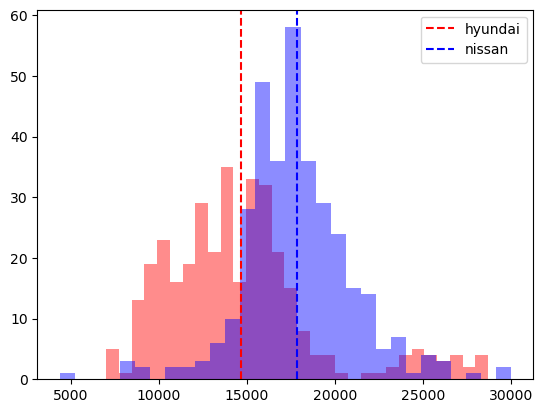

In [37]:
plt.hist(car_train_proc[car_train_proc['model']=='hyundai']['price'], bins=30, alpha=0.45, color='red') 
plt.hist(car_train_proc[car_train_proc['model']=='nissan']['price'], bins=30, alpha=0.45, color='blue') 
plt.axvline(x=car_train_proc[car_train_proc['model']=='hyundai']['price'].mean(),linestyle='dashed',color='red')
plt.axvline(x=car_train_proc[car_train_proc['model']=='nissan']['price'].mean(),linestyle='dashed',color='blue')

plt.legend(['hyundai','nissan']) 
  
plt.show() 

In [38]:
car_train_proc[car_train_proc['model']=='hyundai']['price'].mean()

14633.95652173913

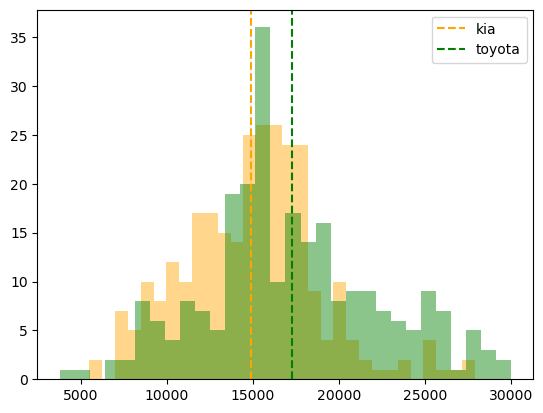

In [39]:
plt.hist(car_train_proc[car_train_proc['model']=='kia']['price'], bins=30, alpha=0.45, color='orange') 
plt.hist(car_train_proc[car_train_proc['model']=='toyota']['price'], bins=30, alpha=0.45, color='green') 
plt.axvline(x=car_train_proc[car_train_proc['model']=='kia']['price'].mean(),linestyle='dashed',color='orange')
plt.axvline(x=car_train_proc[car_train_proc['model']=='toyota']['price'].mean(),linestyle='dashed',color='green')

plt.legend(['kia','toyota']) 
  
plt.show() 

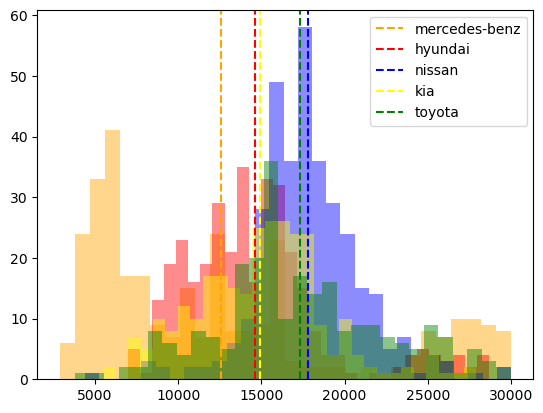

In [40]:
plt.hist(car_train_proc[car_train_proc['model']=='mercedes-benz']['price'], bins=30, alpha=0.45, color='orange') 
plt.hist(car_train_proc[car_train_proc['model']=='hyundai']['price'], bins=30, alpha=0.45, color='red') 
plt.hist(car_train_proc[car_train_proc['model']=='nissan']['price'], bins=30, alpha=0.45, color='blue') 
plt.hist(car_train_proc[car_train_proc['model']=='kia']['price'], bins=30, alpha=0.45, color='yellow') 
plt.hist(car_train_proc[car_train_proc['model']=='toyota']['price'], bins=30, alpha=0.45, color='green') 

plt.axvline(x=car_train_proc[car_train_proc['model']=='mercedes-benz']['price'].mean(),linestyle='dashed',color='orange')
plt.axvline(x=car_train_proc[car_train_proc['model']=='hyundai']['price'].mean(),linestyle='dashed',color='red')
plt.axvline(x=car_train_proc[car_train_proc['model']=='nissan']['price'].mean(),linestyle='dashed',color='blue')
plt.axvline(x=car_train_proc[car_train_proc['model']=='kia']['price'].mean(),linestyle='dashed',color='yellow')
plt.axvline(x=car_train_proc[car_train_proc['model']=='toyota']['price'].mean(),linestyle='dashed',color='green')


plt.legend(['mercedes-benz','hyundai','nissan','kia','toyota']) 
  
plt.show() 

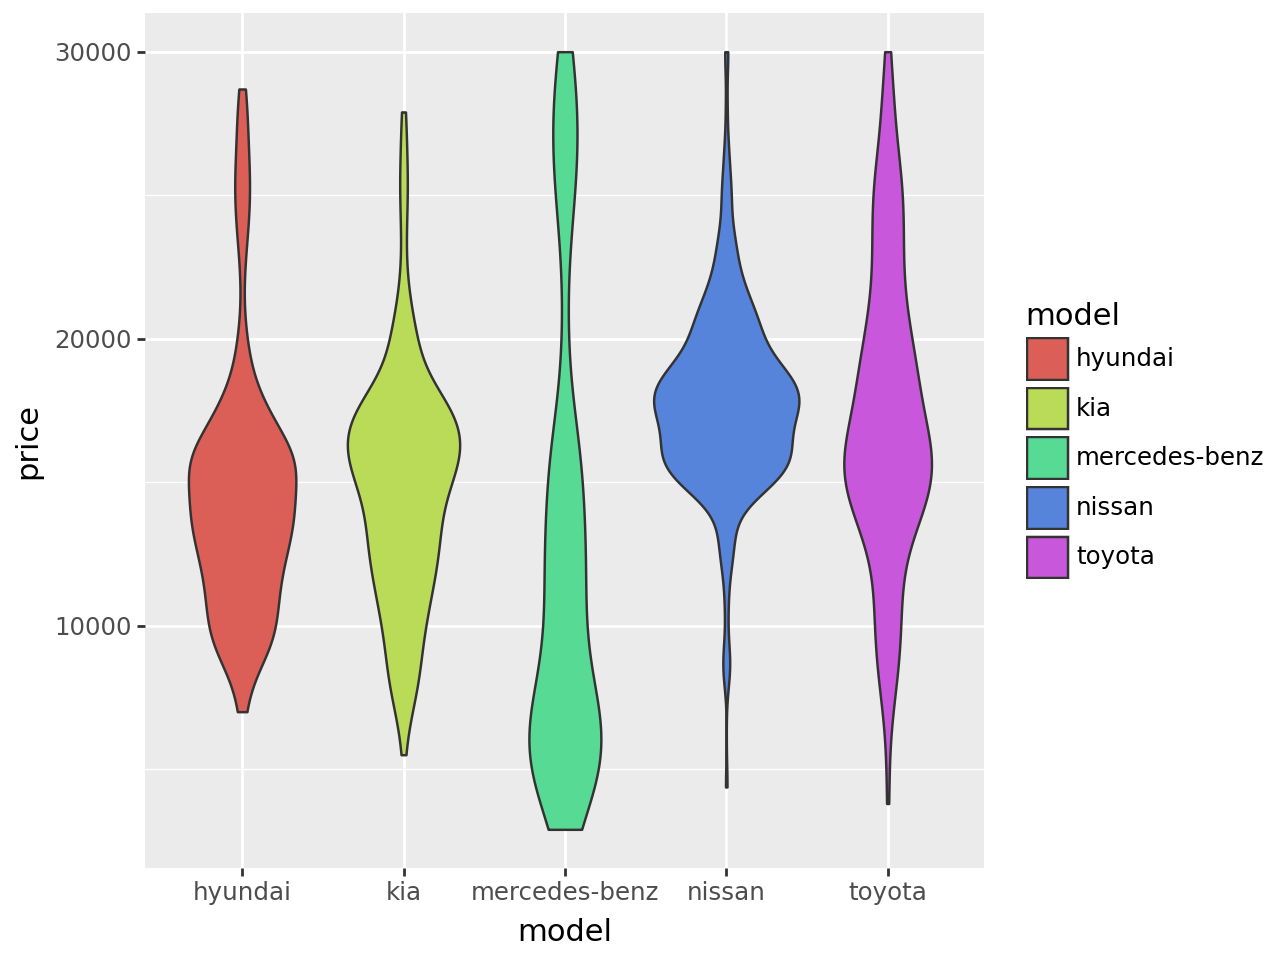

In [41]:
ggplot(car_train_proc) + aes(x='model',y='price',fill='model') + geom_violin()

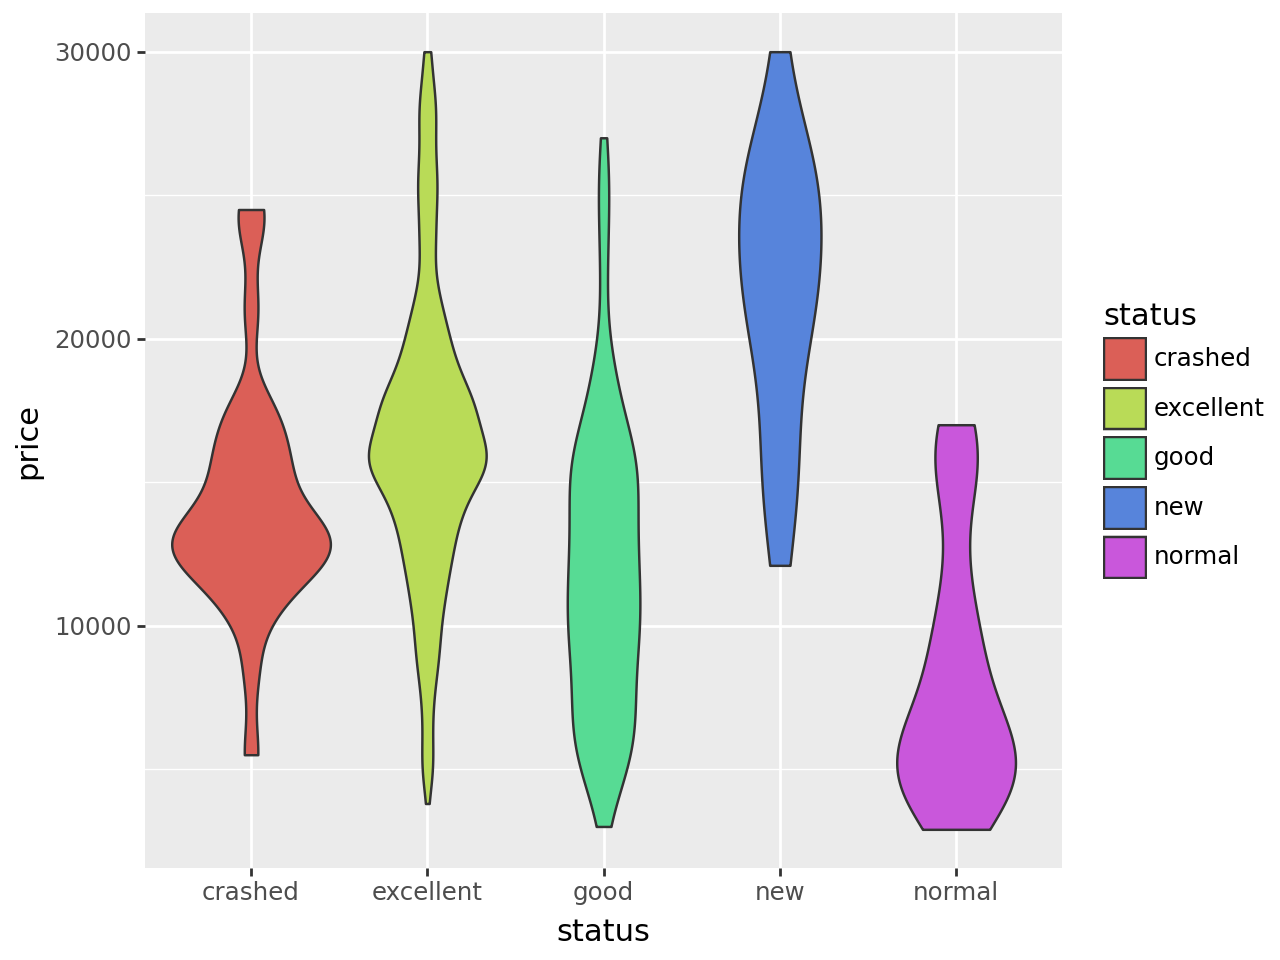

In [42]:
ggplot(car_train_proc) + aes(x='status',y='price',fill='status') + geom_violin()

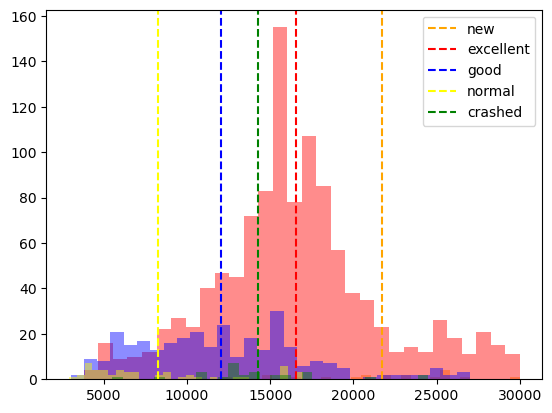

In [43]:
plt.hist(car_train_proc[car_train_proc['status']=='new']['price'], bins=30, alpha=0.45, color='orange') 
plt.hist(car_train_proc[car_train_proc['status']=='excellent']['price'], bins=30, alpha=0.45, color='red') 
plt.hist(car_train_proc[car_train_proc['status']=='good']['price'], bins=30, alpha=0.45, color='blue') 
plt.hist(car_train_proc[car_train_proc['status']=='normal']['price'], bins=30, alpha=0.45, color='yellow') 
plt.hist(car_train_proc[car_train_proc['status']=='crashed']['price'], bins=30, alpha=0.45, color='green') 

plt.axvline(x=car_train_proc[car_train_proc['status']=='new']['price'].mean(),linestyle='dashed',color='orange')
plt.axvline(x=car_train_proc[car_train_proc['status']=='excellent']['price'].mean(),linestyle='dashed',color='red')
plt.axvline(x=car_train_proc[car_train_proc['status']=='good']['price'].mean(),linestyle='dashed',color='blue')
plt.axvline(x=car_train_proc[car_train_proc['status']=='normal']['price'].mean(),linestyle='dashed',color='yellow')
plt.axvline(x=car_train_proc[car_train_proc['status']=='crashed']['price'].mean(),linestyle='dashed',color='green')

plt.legend(['new','excellent','good','normal','crashed']) 
  
plt.show() 

# Prepare before train model

- OS
    - model
    - motor_type
    - color
    - type
    - status


In [44]:
car_train_proc.head()

model  year motor_type        running wheel    color   type  \
0         toyota  2022     petrol       3000  km  left  skyblue  sedan   
1  mercedes-benz  2014     petrol     132000  km  left    black  sedan   
2            kia  2018     petrol   95000  miles  left    other  sedan   
3  mercedes-benz  2002     petrol  137000  miles  left   golden  sedan   
4  mercedes-benz  2017     petrol     130000  km  left    black  sedan   

      status  motor_volume  price  running_nm running_unit  running_km  
0  excellent           2.0  24500        3000           km      3000.0  
1  excellent           2.0  25500      132000           km    132000.0  
2  excellent           2.0  11700       95000        miles    152950.0  
3  excellent           3.2  12000      137000        miles    220570.0  
4       good           2.0  26000      130000           km    130000.0

In [45]:
car_prep = car_train_proc[:]

In [46]:
dummy_model = pd.get_dummies(car_prep['model'],drop_first=True)
dummy_motor_type = pd.get_dummies(car_prep['motor_type'],drop_first=True)
dummy_color = pd.get_dummies(car_prep['color'],drop_first=True)
dummy_type = pd.get_dummies(car_prep['type'],drop_first=True)
dummy_status = pd.get_dummies(car_prep['status'],drop_first=True)

car_prep_dum = pd.concat([car_prep,dummy_model, 
                       dummy_motor_type,dummy_color,dummy_type,dummy_status], axis=1)



In [47]:
car_prep_dum = car_prep_dum.drop(['model', 'motor_type','running'
                                  ,'wheel','color','type','status','running_nm','running_unit'], axis=1)

In [48]:
car_prep_dum

year  motor_volume  price  running_km    kia  mercedes-benz  nissan  \
0     2022           2.0  24500      3000.0  False          False   False   
1     2014           2.0  25500    132000.0  False           True   False   
2     2018           2.0  11700    152950.0   True          False   False   
3     2002           3.2  12000    220570.0  False           True   False   
4     2017           2.0  26000    130000.0  False           True   False   
...    ...           ...    ...         ...    ...            ...     ...   
1637  2017           2.0  12400    193200.0  False          False   False   
1638  2014           2.0  16500    170000.0  False          False   False   
1639  2018           2.0  19500    110929.0  False          False    True   
1640  2019           2.0  19500     49910.0  False          False    True   
1641  2022           2.0  28500        20.0  False          False   False   

      toyota    gas  hybrid  ...  Universal  hatchback  minivan / minibus  \
0       True  False   False  ...      False      False              False   
1      False  False   False  ...      False      False              False   
2      False  False   False  ...      False      False              False   
3      False  False   False  ...      False      False              False   
4      False  False   False  ...      False      False              False   
...      ...    ...     ...  ...        ...        ...                ...   
1637   False  False   False  ...      False      False              False   
1638    True  False   False  ...      False      False              False   
1639   False  False   False  ...      False      False              False   
1640   False  False   False  ...      False      False              False   
1641    True  False   False  ...      False      False              False   

      pickup  sedan    suv  excellent   good    new  normal  
0      False   True  False       True  False  False   False  
1      False   True  False       True  False  False   False  
2      False   True  False       True  False  False   False  
3      False   True  False       True  False  False   False  
4      False   True  False      False   True  False   False  
...      ...    ...    ...        ...    ...    ...     ...  
1637   False   True  False      False   True  False   False  
1638   False   True  False      False   True  False   False  
1639   False  False   True      False   True  False   False  
1640   False  False   True       True  False  False   False  
1641   False   True  False       True  False  False   False  

[1534 rows x 38 columns]

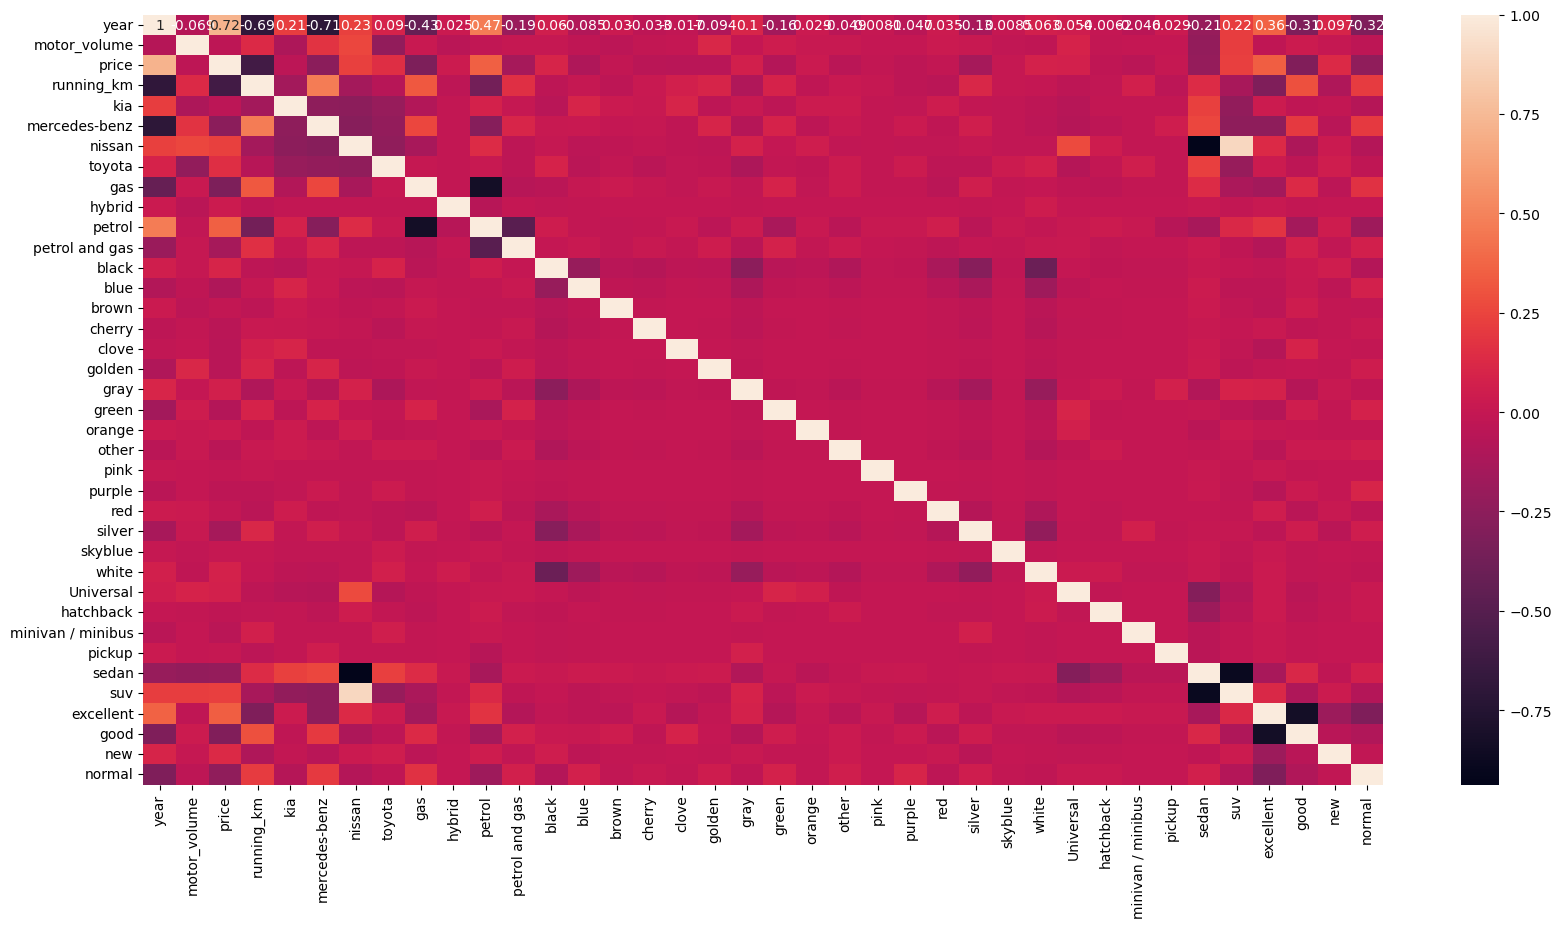

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(car_prep_dum.corr(), annot=True)
plt.show()

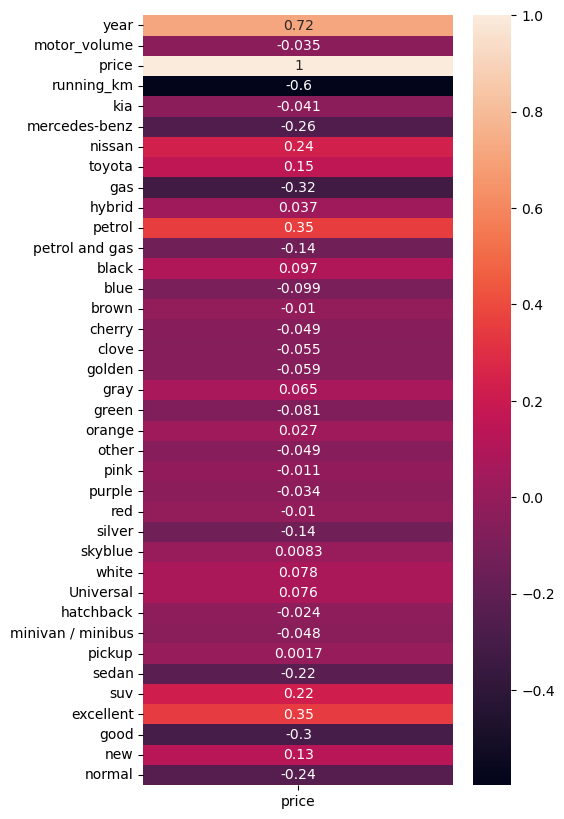

In [50]:
plt.figure(figsize=(5,10))
sns.heatmap(car_prep_dum.corr()[['price']], annot=True)
plt.show()

# Sample split

In [51]:
X = car_prep_dum.drop(['price'], axis=1)
y = car_prep_dum['price']

In [52]:
X_train, X_val,y_train,y_val = train_test_split(X,y,test_size =0.2)

In [53]:
X_train.head()

year  motor_volume  running_km    kia  mercedes-benz  nissan  toyota  \
295   2019           2.0     78890.0   True          False   False   False   
927   2019           1.6     54000.0  False          False   False    True   
48    2008           3.0       250.0  False           True   False   False   
993   2021           2.0     36000.0  False          False   False   False   
1327  2019           2.0     70000.0  False          False   False    True   

        gas  hybrid  petrol  ...  Universal  hatchback  minivan / minibus  \
295   False   False    True  ...      False      False              False   
927   False   False    True  ...      False      False              False   
48    False   False    True  ...      False      False              False   
993   False   False    True  ...      False      False              False   
1327  False   False    True  ...      False      False              False   

      pickup  sedan    suv  excellent   good    new  normal  
295    False   True  False       True  False  False   False  
927    False   True  False       True  False  False   False  
48     False   True  False      False   True  False   False  
993    False   True  False       True  False  False   False  
1327   False   True  False       True  False  False   False  

[5 rows x 37 columns]

In [54]:
y_train.head()

295     17000
927     15750
48      10800
993     26200
1327    26000
Name: price, dtype: int64

# Train model

- DecisionTreeRegressor  # Decision Tree
- RandomForestRegressor  # Random Forest
- GradientBoostingRegressor  # Gradient Boosting

In [55]:
model_ls = [DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()
            ,SVR(),AdaBoostRegressor(),ExtraTreesRegressor(),XGBRegressor()]



In [56]:
m_ls=['decision tree','random forest','gradient boosting','svr','adaboost','extratree','xgboost']
mse_ls=[]
mape_ls=[]
r2_ls=[]


for m in model_ls:
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    mse_ls.append(mse)
    mape_ls.append(mape)
    r2_ls.append(r2)

In [57]:
eval_df = pd.DataFrame(
    {'model': m_ls,
     'mse': mse_ls,
     'mape': mape_ls,
     'r2': r2_ls
    })

In [58]:
eval_df

model           mse      mape        r2
0      decision tree  1.297937e+07  0.168279  0.611656
1      random forest  8.025941e+06  0.128252  0.759863
2  gradient boosting  6.543127e+06  0.126959  0.804229
3                svr  3.267982e+07  0.393111  0.022216
4           adaboost  1.257420e+07  0.224057  0.623779
5          extratree  9.231935e+06  0.140098  0.723780
6            xgboost  8.662720e+06  0.137712  0.740811

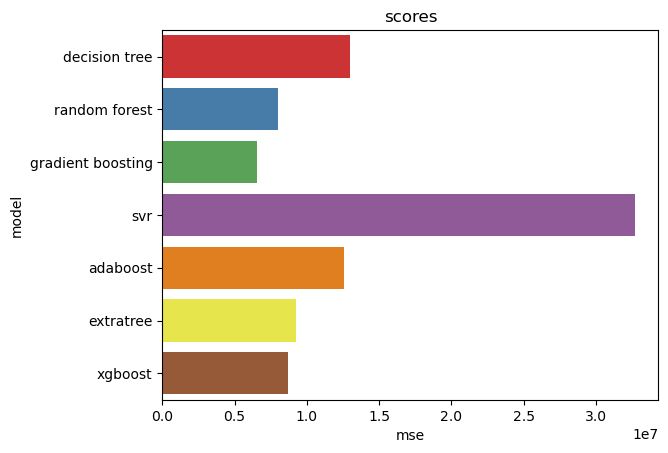

In [59]:
g = sns.barplot(x=eval_df["mse"],y =eval_df["model"],  palette="Set1",orient = "h")
g.set_xlabel("mse")
g = g.set_title("scores")
plt.show()

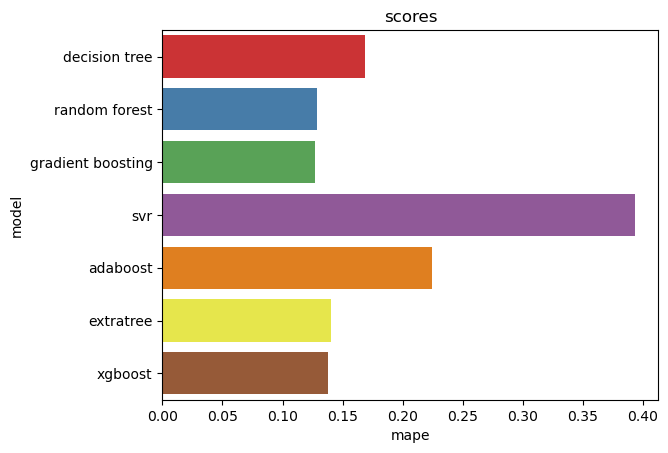

In [60]:
g = sns.barplot(x=eval_df["mape"],y =eval_df["model"],  palette="Set1",orient = "h")
g.set_xlabel("mape")
g = g.set_title("scores")
plt.show()

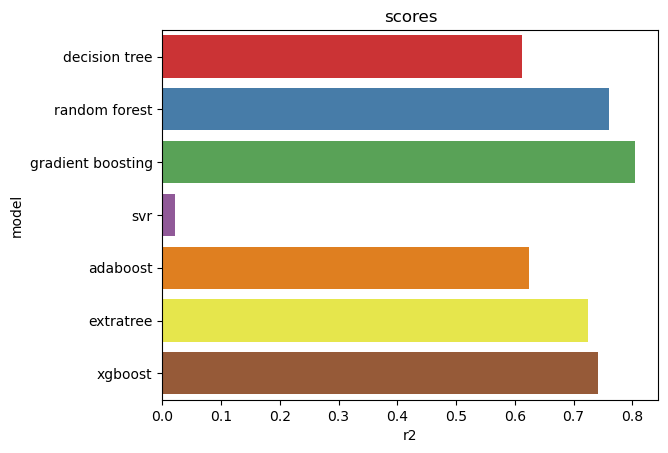

In [61]:
g = sns.barplot(x=eval_df["r2"],y =eval_df["model"],  palette="Set1",orient = "h")
g.set_xlabel("r2")
g = g.set_title("scores")
plt.show()

Feature: 0, Score: 0.64433
Feature: 1, Score: 0.01925
Feature: 2, Score: 0.09281
Feature: 3, Score: 0.00704
Feature: 4, Score: 0.09451
Feature: 5, Score: 0.02239
Feature: 6, Score: 0.03718
Feature: 7, Score: 0.00131
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00200
Feature: 10, Score: 0.00291
Feature: 11, Score: 0.00903
Feature: 12, Score: 0.00315
Feature: 13, Score: 0.00346
Feature: 14, Score: 0.00018
Feature: 15, Score: 0.00008
Feature: 16, Score: 0.00090
Feature: 17, Score: 0.00354
Feature: 18, Score: 0.00059
Feature: 19, Score: 0.00033
Feature: 20, Score: 0.00090
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00004
Feature: 23, Score: 0.00162
Feature: 24, Score: 0.00598
Feature: 25, Score: 0.00011
Feature: 26, Score: 0.00793
Feature: 27, Score: 0.00250
Feature: 28, Score: 0.00047
Feature: 29, Score: 0.00002
Feature: 30, Score: 0.00031
Feature: 31, Score: 0.01337
Feature: 32, Score: 0.00336
Feature: 33, Score: 0.01108
Feature: 34, Score: 0.00368
Feature: 35, Score: 0.00123
Fe

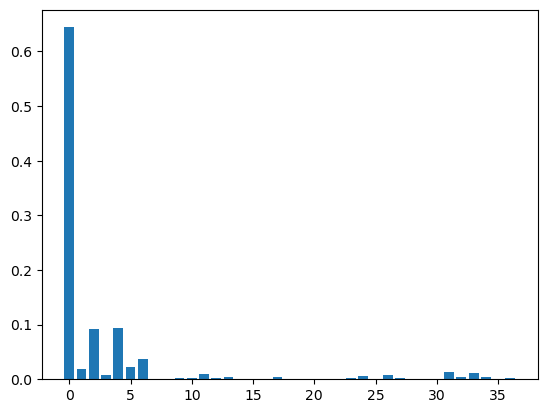

In [62]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [63]:
importance

array([6.44329064e-01, 1.92531861e-02, 9.28061280e-02, 7.03710148e-03,
       9.45111490e-02, 2.23922249e-02, 3.71771714e-02, 1.31148761e-03,
       0.00000000e+00, 1.99991923e-03, 2.90717923e-03, 9.03010907e-03,
       3.14564458e-03, 3.46455928e-03, 1.75521130e-04, 8.32515409e-05,
       8.98478050e-04, 3.53937502e-03, 5.89000401e-04, 3.27468284e-04,
       8.97765777e-04, 8.66542125e-06, 4.42707054e-05, 1.62426909e-03,
       5.98077304e-03, 1.12258062e-04, 7.93218297e-03, 2.50175226e-03,
       4.69176053e-04, 1.73232659e-05, 3.10629132e-04, 1.33741801e-02,
       3.35874403e-03, 1.10796562e-02, 3.68234755e-03, 1.23230164e-03,
       2.39568676e-03])

# Tune parameter

In [64]:
param_grid_dt = {'max_depth': [None, 5, 10, 20, 30]}
param_grid_rf = {'n_estimators': [20, 50, 100, 200, 300, 500], 'max_depth': [None, 5, 10, 20, 30]
                 ,'max_features': [1, 3, 5, 10, 20, None]}
param_grid_gb = {'n_estimators': [20, 50, 100, 200, 300, 500], 'max_depth': [None, 5, 10, 20, 30] 
                 ,'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}

In [65]:
# Initialize models

dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

In [66]:
#grid_dt = GridSearchCV(dt, param_grid_dt, scoring='neg_mean_absolute_percentage_error', cv=5)
#grid_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_mean_absolute_percentage_error', cv=5)
#grid_gb = GridSearchCV(gb, param_grid_gb, scoring='neg_mean_absolute_percentage_error', cv=5)

grid_dt = GridSearchCV(dt, param_grid_dt, scoring='r2')
grid_rf = GridSearchCV(rf, param_grid_rf, scoring='r2')
grid_gb = GridSearchCV(gb, param_grid_gb, scoring='r2')

In [67]:
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [None, 5, 10, 20, 30],
                         'n_estimators': [20, 50, 100, 200, 300, 500]},
             scoring='r2')

In [68]:
best_params_dt = grid_dt.best_params_
best_params_rf = grid_rf.best_params_
best_params_gb = grid_gb.best_params_

best_estimator_dt = grid_dt.best_estimator_
best_estimator_rf = grid_rf.best_estimator_
best_estimator_gb = grid_gb.best_estimator_

In [69]:
y_pred_dt = best_estimator_dt.predict(X_val)
y_pred_rf = best_estimator_rf.predict(X_val)
y_pred_gb = best_estimator_gb.predict(X_val)

In [70]:
mse_dt = mean_squared_error(y_val, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_val, y_pred_dt)
r2_dt = r2_score(y_val, y_pred_dt)

mse_rf = mean_squared_error(y_val, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

mse_gb = mean_squared_error(y_val, y_pred_gb)
mape_gb = mean_absolute_percentage_error(y_val, y_pred_gb)
r2_gb = r2_score(y_val, y_pred_gb)

In [71]:
print("Decision Tree")
print("Best Parameters : ", best_params_dt)
print("Mean Squared Error : ", mse_dt)
print("Mean Squared Percentage Error : ", mape_dt)
print("R-squared : ", r2_dt)
print('------------------------------------')

print("Random Forest")
print("Best Parameters : ", best_params_rf)
print("Mean Squared Error : ", mse_rf)
print("Mean Squared Percentage Error : ", mape_rf)
print("R-squared : ", r2_rf)
print('------------------------------------')

print("Gradient Boosting")
print("Best Parameters : ", best_params_gb)
print("Mean Squared Error : ", mse_dt)
print("Mean Squared Percentage Error : ", mape_gb)
print("R-squared : ", r2_gb)
print('------------------------------------')

Decision Tree
Best Parameters :  {'max_depth': 5}
Mean Squared Error :  9757303.239763433
Mean Squared Percentage Error :  0.15619305727841382
R-squared :  0.7080604616628019
------------------------------------
Random Forest
Best Parameters :  {'max_depth': 10, 'max_features': 20, 'n_estimators': 500}
Mean Squared Error :  6962268.67251748
Mean Squared Percentage Error :  0.1253543036321116
R-squared :  0.7916881896474123
------------------------------------
Gradient Boosting
Best Parameters :  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
Mean Squared Error :  9757303.239763433
Mean Squared Percentage Error :  0.13375567862532406
R-squared :  0.7721904367869656
------------------------------------


In [72]:
text_representation = tree.export_text(best_estimator_dt)
print(text_representation)

|--- feature_0 <= 2013.50
|   |--- feature_0 <= 2006.50
|   |   |--- feature_27 <= 0.50
|   |   |   |--- feature_10 <= 0.50
|   |   |   |   |--- feature_0 <= 2004.50
|   |   |   |   |   |--- value: [6108.49]
|   |   |   |   |--- feature_0 >  2004.50
|   |   |   |   |   |--- value: [7779.17]
|   |   |   |--- feature_10 >  0.50
|   |   |   |   |--- feature_0 <= 1996.50
|   |   |   |   |   |--- value: [3933.33]
|   |   |   |   |--- feature_0 >  1996.50
|   |   |   |   |   |--- value: [9761.11]
|   |   |--- feature_27 >  0.50
|   |   |   |--- value: [15750.00]
|   |--- feature_0 >  2006.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |--- value: [9723.51]
|   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |--- value: [8482.69]
|   |   |   |--- feature_6 >  0.50
|   |   |   |   |--- feature_0 <= 2010.50
|   |   |   |   |   |--- value: [8858.76]
|   |   |   |   |--- feature_0 >  2010.50
|   |   |   |   | 

In [73]:
best_estimator_dt

DecisionTreeRegressor(max_depth=5)

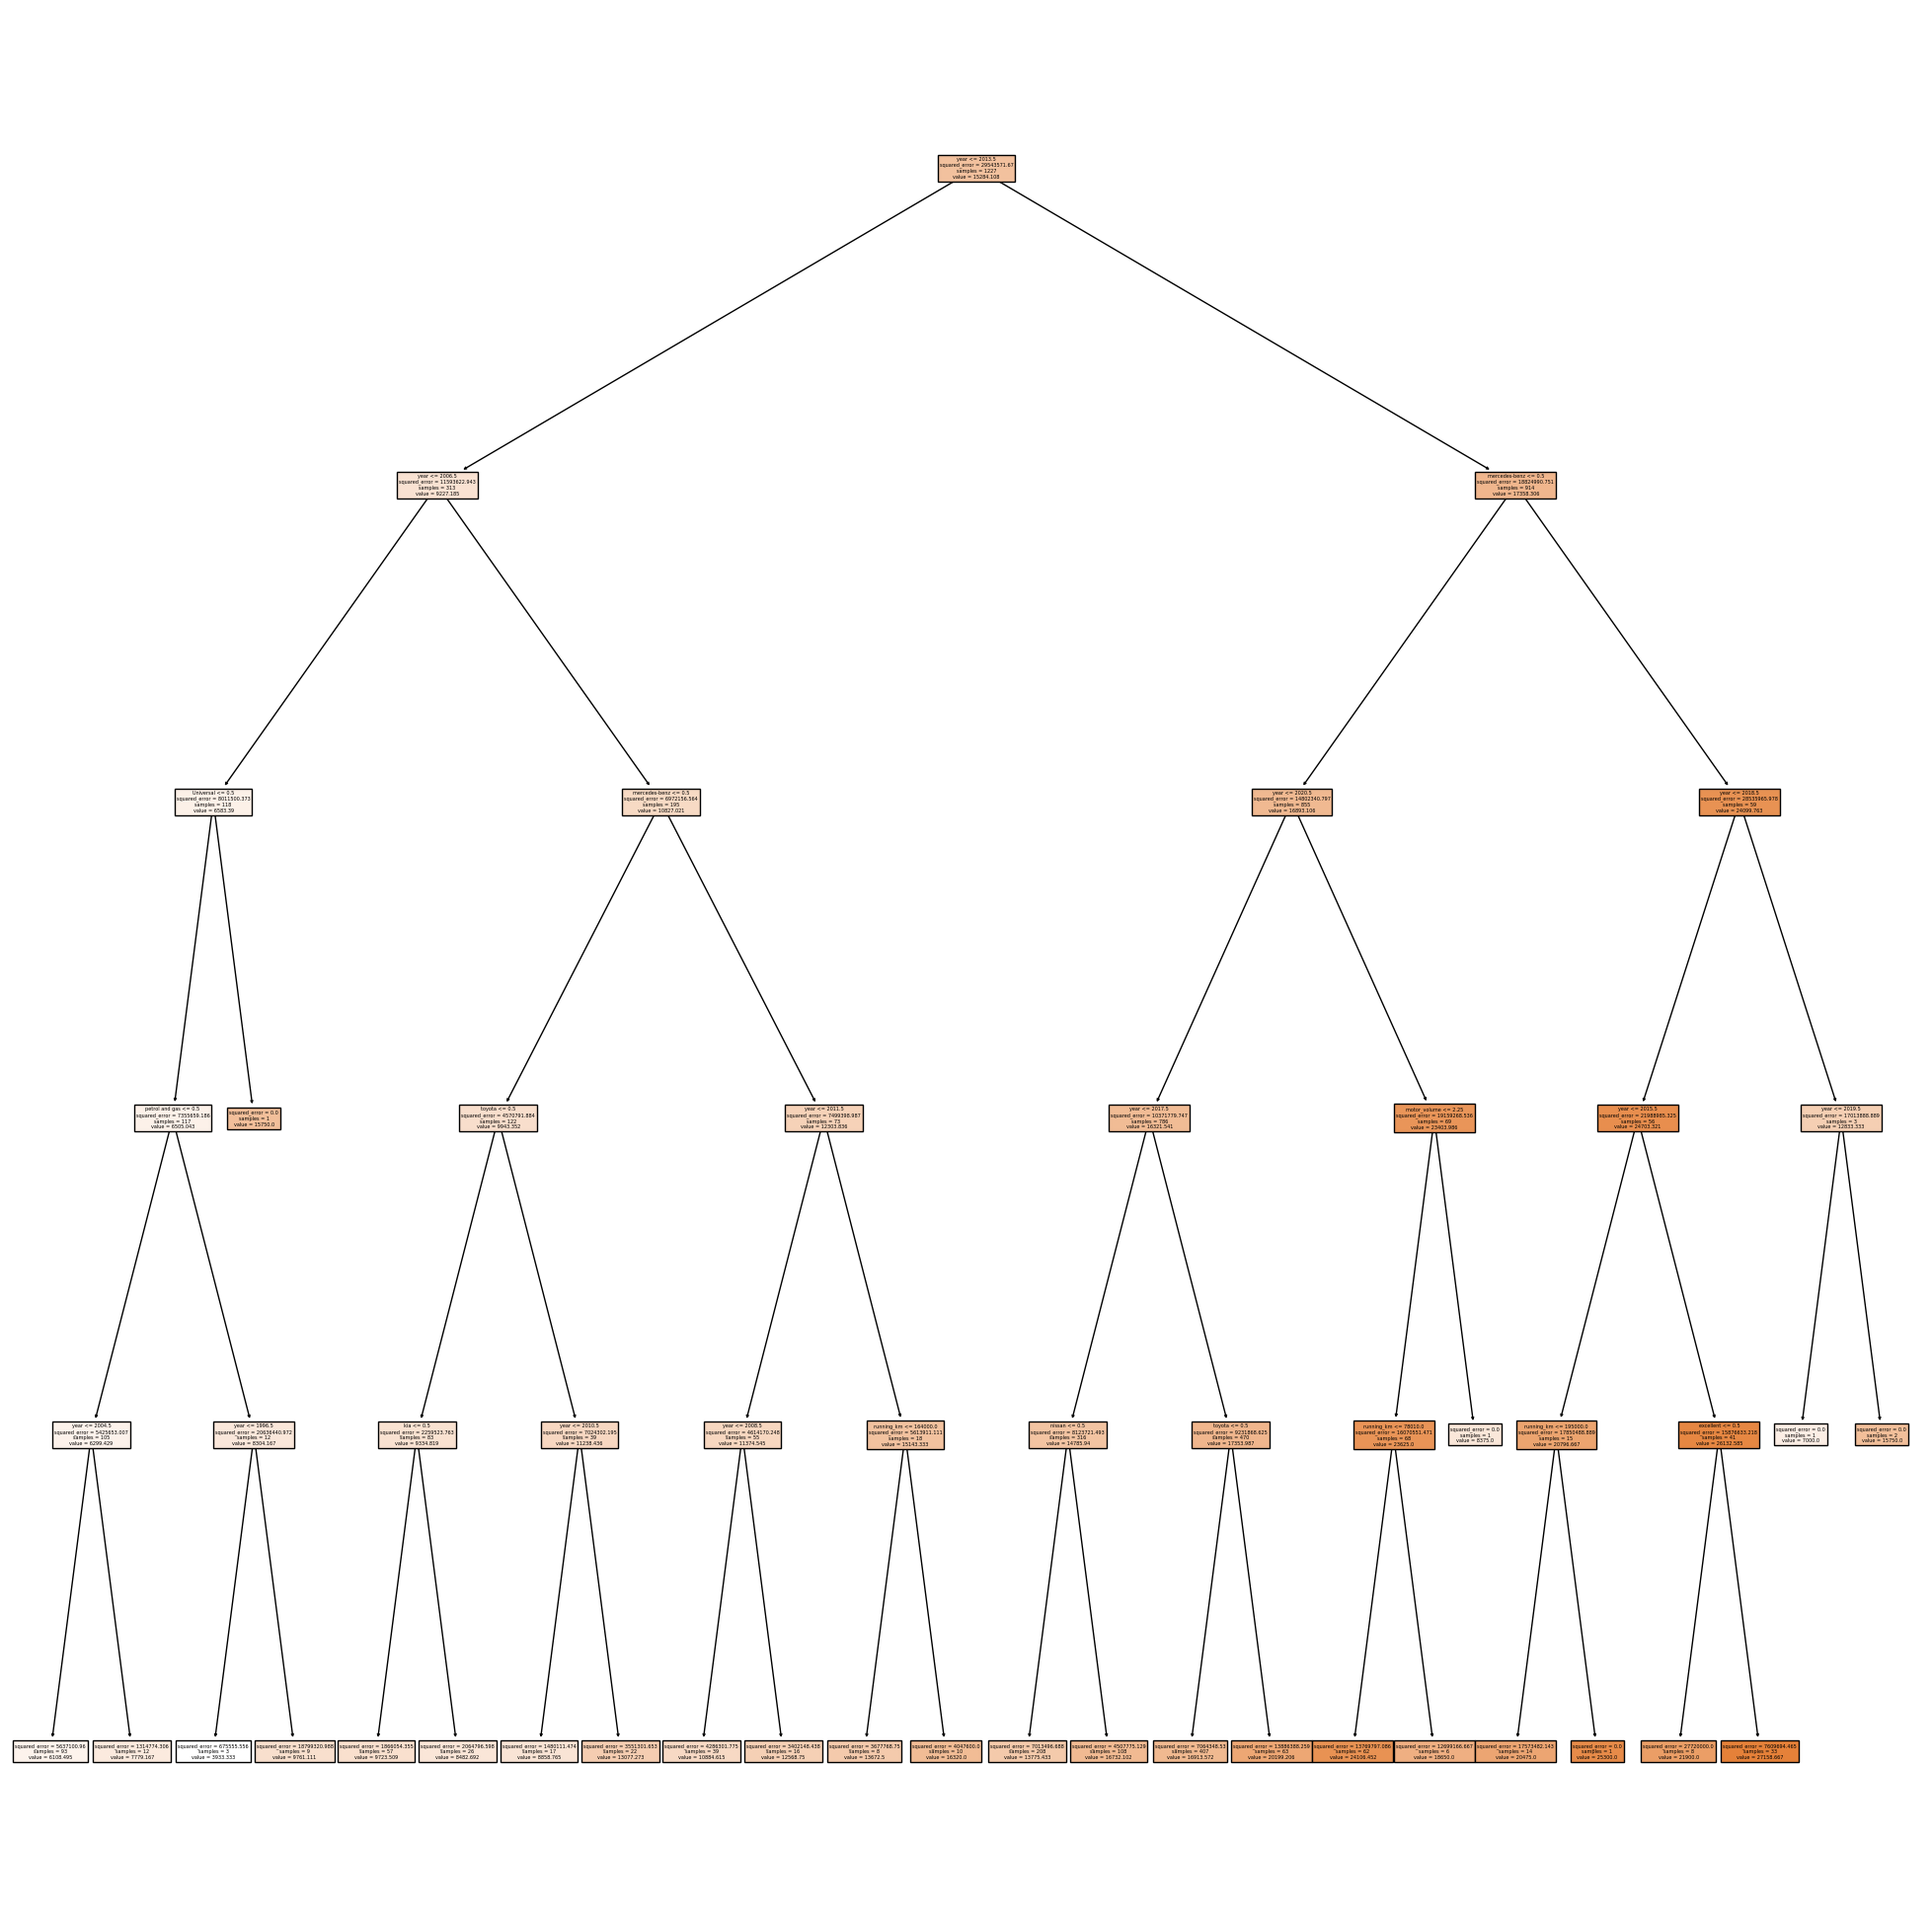

In [74]:
fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(best_estimator_dt, feature_names=X_train.columns.values, filled=True)
plt.show()

In [75]:
best_estimator_rf.estimators_[0]

DecisionTreeRegressor(max_depth=10, max_features=20, random_state=1052926164)

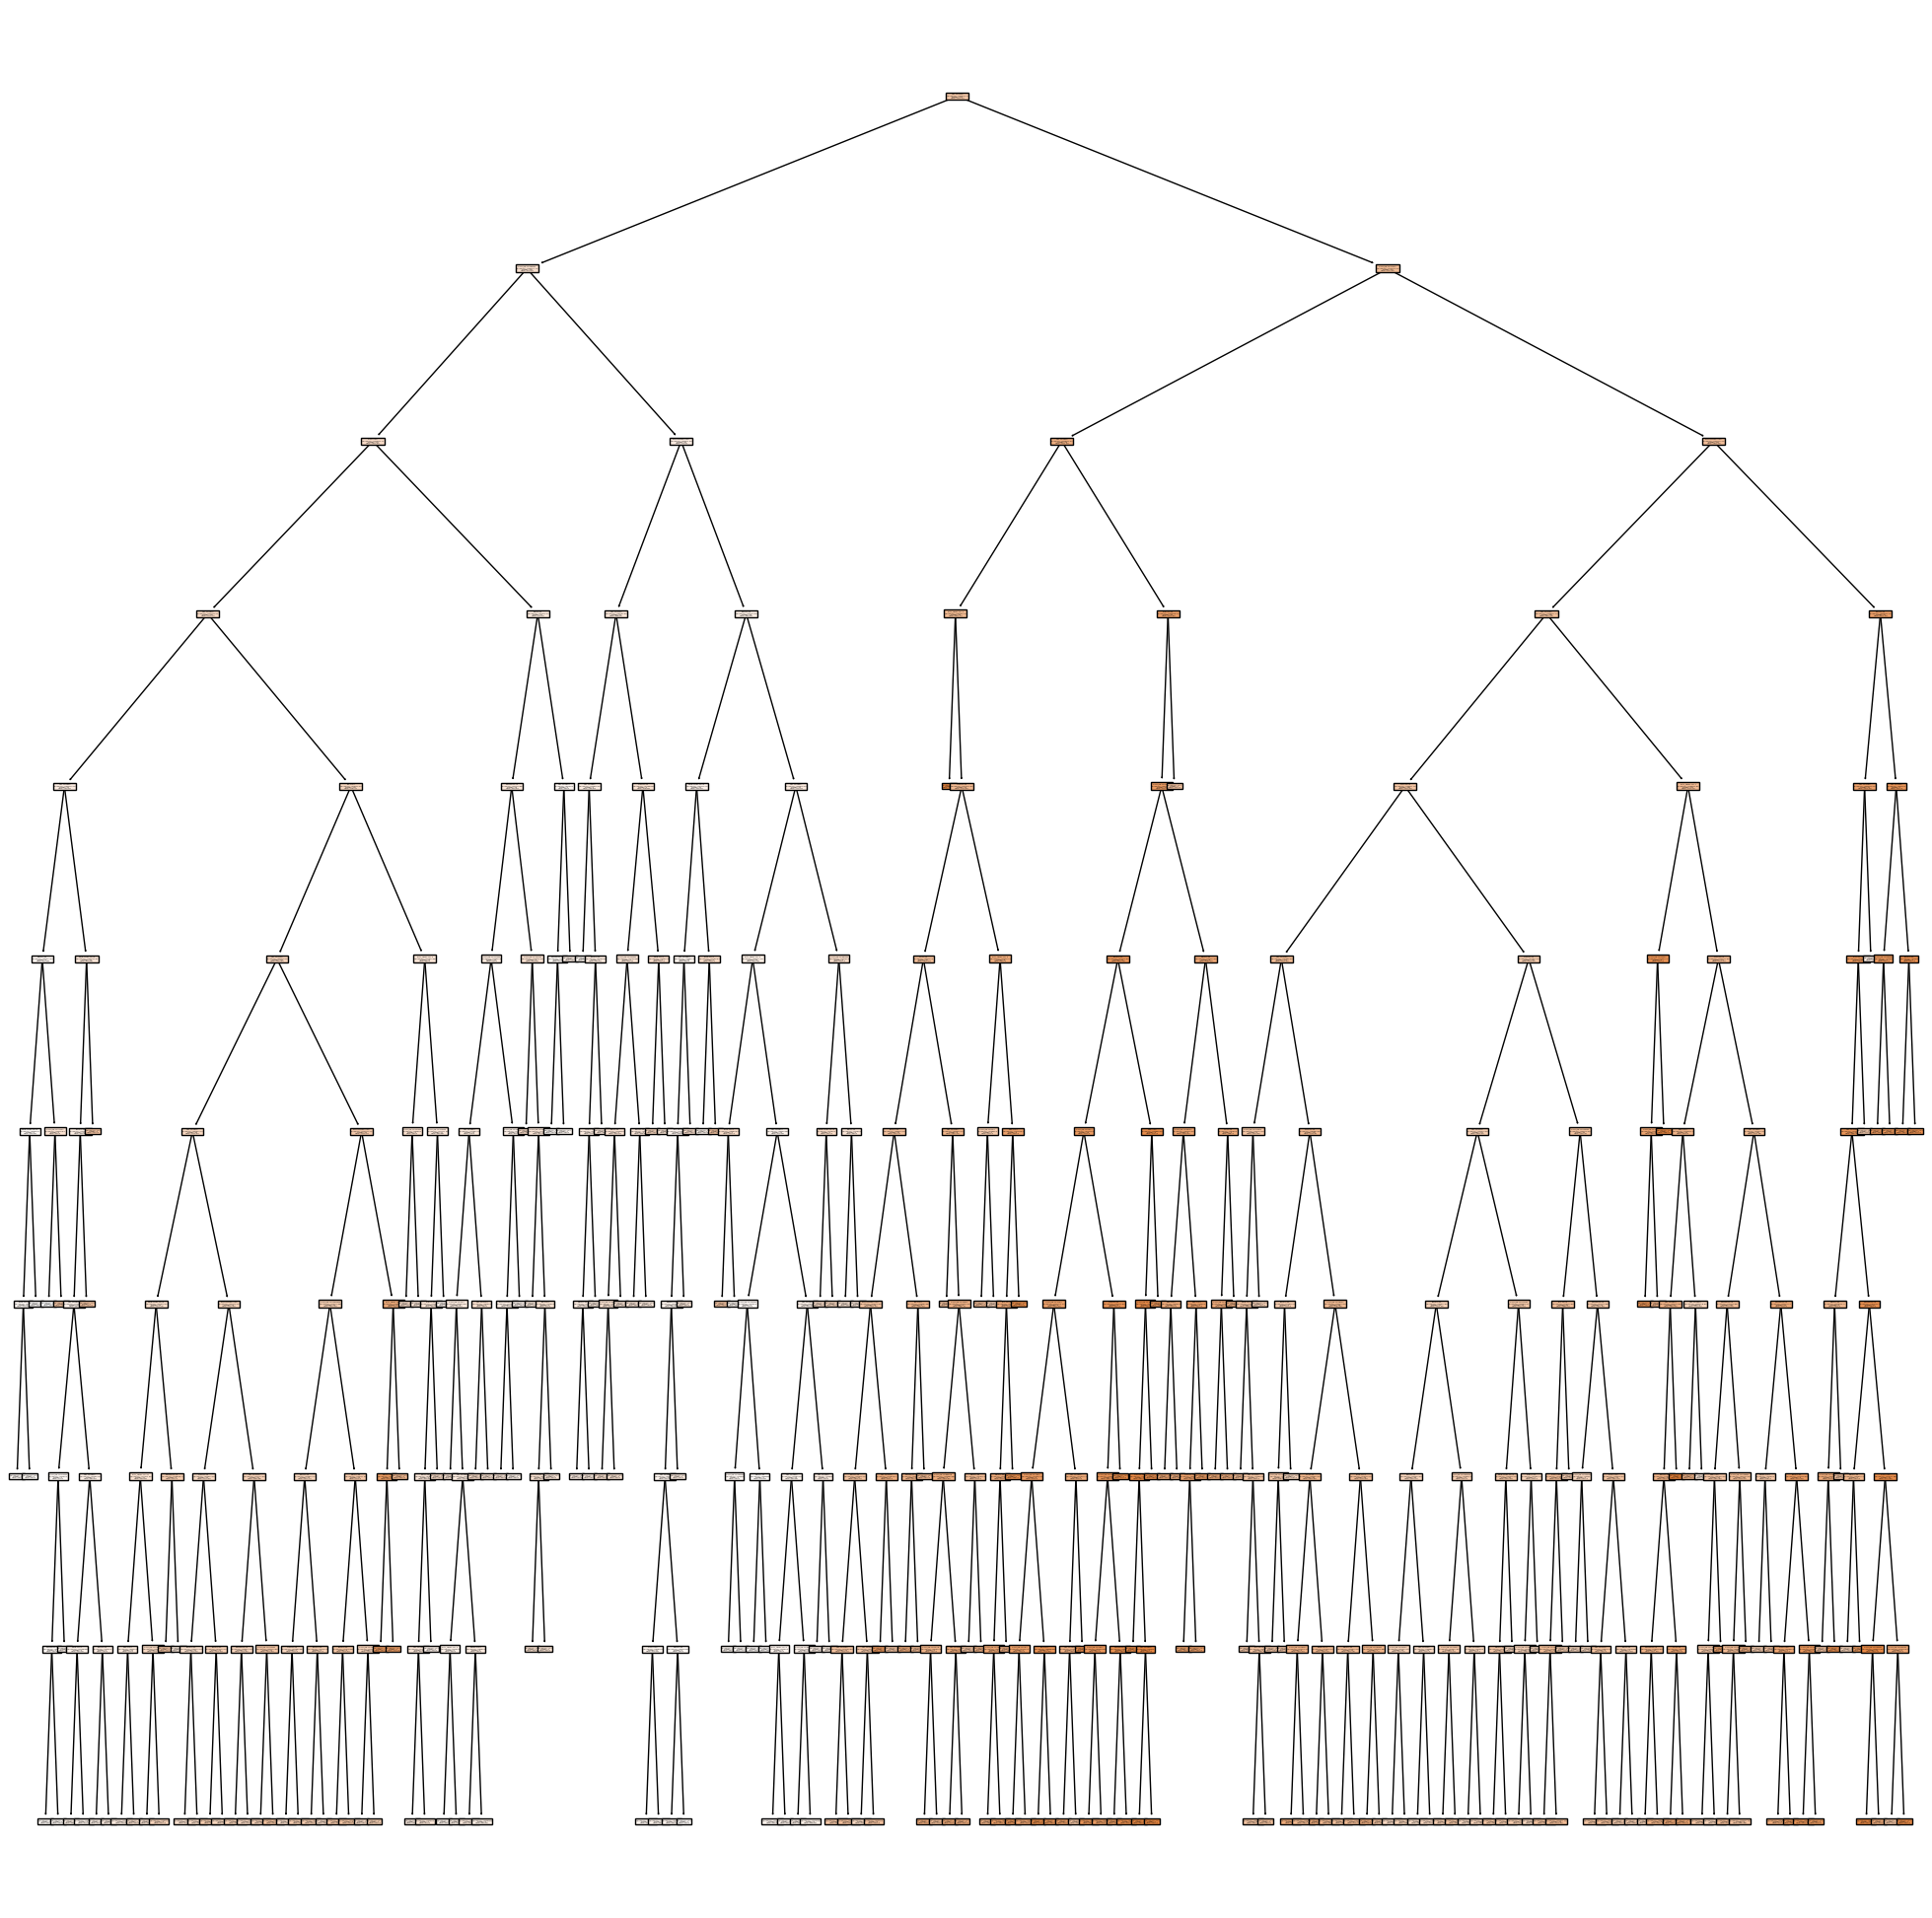

In [76]:
fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(best_estimator_rf.estimators_[0], feature_names=X_train.columns.values, filled=True)
plt.show()

# --------------------------------------------------------------------------------

# Prepare test dataset

In [77]:
car_test_data.head()

Id          model  year motor_type       running wheel   color       type  \
0   0            kia  2020     petrol     24000  km  left   black      sedan   
1   1         nissan  2017     petrol  85000  miles  left   white        suv   
2   2        hyundai  2021     petrol  30000  miles  left   white      sedan   
3   3            kia  2018     petrol  53000  miles  left  silver      sedan   
4   4  mercedes-benz  2003     petrol    230000  km  left   black  Universal   

      status  motor_volume  
0  excellent           2.0  
1  excellent           2.0  
2  excellent           2.0  
3  excellent           2.0  
4     normal           1.8

In [78]:
car_test_prep = car_test_data[:]

In [79]:
car_test_prep.tail()

Id          model  year motor_type        running wheel  color   type  \
406  406         nissan  2021     petrol      33400  km  left  black    suv   
407  407        hyundai  2017     petrol   60000  miles  left  other  sedan   
408  408  mercedes-benz  2012     petrol     218000  km  left  white  sedan   
409  409            kia  2020     petrol   40000  miles  left    red  sedan   
410  410        hyundai  2017     petrol  120000  miles  left  white  sedan   

        status  motor_volume  
406  excellent           2.0  
407  excellent           2.0  
408       good           2.0  
409       good           2.0  
410  excellent           2.0

In [80]:
car_test_prep['running_nm'] = car_test_prep.apply(lambda x: int(x["running"].split(" ")[0]), axis=1)
car_test_prep['running_unit'] = car_test_prep.apply(lambda x: x["running"].split(" ")[2], axis=1)

car_test_prep['running_km'] = np.nan

/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/2249902076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/2249902076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/2249902076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [81]:
for i in range(len(car_test_prep)):
    if car_test_prep['running_unit'][i] == 'miles':
        car_test_prep['running_km'][i] = car_test_prep['running_nm'][i] * 1.61
    else:
        car_test_prep['running_km'][i] = car_test_prep['running_nm'][i]

/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/1390903307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/1390903307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28802/1390903307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/dc/rts3gxy959v0s806sprp248w0000gn/T/ipykernel_28

In [82]:
dummy_model = pd.get_dummies(car_test_prep['model'],drop_first=True)
dummy_motor_type = pd.get_dummies(car_test_prep['motor_type'],drop_first=True)
dummy_color = pd.get_dummies(car_test_prep['color'],drop_first=True)
dummy_type = pd.get_dummies(car_test_prep['type'],drop_first=True)
dummy_status = pd.get_dummies(car_test_prep['status'],drop_first=True)

car_test_prep = pd.concat([car_test_prep,dummy_model, 
                       dummy_motor_type,dummy_color,dummy_type,dummy_status], axis=1)

car_test_prep = car_test_prep.drop(['Id','model', 'motor_type','running'
                                  ,'wheel','color','type','status','running_nm','running_unit'], axis=1)

In [83]:
car_test_prep['hybrid'] = False
car_test_prep['golden'] = False
car_test_prep['pink'] = False
car_test_prep['purple'] = False
car_test_prep['minivan / minibus'] = False
car_test_prep['pickup'] = False
car_test_prep['gas'] = False

In [84]:
car_test_prep.columns

Index(['year', 'motor_volume', 'running_km', 'kia', 'mercedes-benz', 'nissan',
       'toyota', 'petrol', 'petrol and gas', 'black', 'blue', 'brown',
       'cherry', 'clove', 'gray', 'green', 'orange', 'other', 'red', 'silver',
       'skyblue', 'white', 'Universal', 'hatchback', 'sedan', 'suv',
       'excellent', 'good', 'new', 'normal', 'hybrid', 'golden', 'pink',
       'purple', 'minivan / minibus', 'pickup', 'gas'],
      dtype='object')

In [85]:
X_train.columns

Index(['year', 'motor_volume', 'running_km', 'kia', 'mercedes-benz', 'nissan',
       'toyota', 'gas', 'hybrid', 'petrol', 'petrol and gas', 'black', 'blue',
       'brown', 'cherry', 'clove', 'golden', 'gray', 'green', 'orange',
       'other', 'pink', 'purple', 'red', 'silver', 'skyblue', 'white',
       'Universal', 'hatchback', 'minivan / minibus', 'pickup', 'sedan', 'suv',
       'excellent', 'good', 'new', 'normal'],
      dtype='object')

In [86]:
car_test_prep = car_test_prep[X_train.columns.values]

# Predict test data

In [87]:
pred_test = best_estimator_rf.predict(car_test_prep)

In [88]:
pred_test

array([16857.91359773, 16690.31114982, 24408.77630218, 14920.1270246 ,
        8620.88777408, 22107.18429865,  5849.87631773,  7650.76788466,
       16651.65066745, 18211.9629369 , 16976.57779828,  7478.13504436,
       13978.74726151, 10712.76362662, 16987.98644271, 10144.82501475,
       17647.50353396, 16562.96642474, 14569.80216046, 11524.36756705,
        5760.50251148,  5714.60919361, 13469.19562831, 16840.57964171,
       19862.35802798, 21783.70015067, 19462.38278606, 17543.02539249,
        5660.84884218, 16182.65818346, 18477.59007915, 13544.39063002,
       14768.60602145,  6002.53702616, 25088.3802975 , 18745.82994723,
       10309.8146803 , 17881.06609825, 18244.99350187, 18984.54831187,
       15374.17698632, 16602.20045847, 17657.70560458, 27430.42590107,
       18144.53847741, 18814.38772382, 13654.51278667, 12163.32654388,
       17825.77017804,  8827.02111594, 22133.53470586,  5620.57334749,
       16634.94733323, 16606.18610564, 15761.64678005, 19468.32232746,
      

In [89]:
sample_sub

Id  price
0      0     38
1      1  20549
2      2   3927
3      3   5572
4      4  28598
..   ...    ...
406  406   2514
407  407  20307
408  408  27274
409  409  14422
410  410   9376

[411 rows x 2 columns]

In [90]:
pred_result = pd.DataFrame({'Id': car_test_data['Id'], 
                   'price': pred_test})

In [91]:
pred_result

Id         price
0      0  16857.913598
1      1  16690.311150
2      2  24408.776302
3      3  14920.127025
4      4   8620.887774
..   ...           ...
406  406  21966.765129
407  407  14015.345870
408  408  13076.361734
409  409  15184.737278
410  410  13360.113166

[411 rows x 2 columns]

In [92]:
pred_result.to_csv('submission.csv', index=False)